# Finding Dogs a Home 
## Table of Contents
3. Machine Learning<br>
3a. [Machine Learning Models](#Models)<br>
3b. [Machine Learning on Louisville](#Louis)<br>
3c. [Machine Learning on Dallas](#Dallas)<br>
3d. [Machine Learning Austin](#Models)<br>
3e. [Machine Learning Sonoma](#Models)<br>
3f. [Remarks on the Learning Models](#Remarks)<br><br>

4. [Future Work](#Future)

<a id='Data_wrangling'></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from datetime import datetime as dt
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.svm import SVC
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV, train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
from keras import Sequential
from keras.layers import BatchNormalization, Dropout, Dense, Activation

Using TensorFlow backend.
C:\Users\sadmin\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\sadmin\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\sadmin\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\sadmin\Anaconda3\lib\site-packages\tensorflow\python\framework\dtype

# 3. Machine Learning
Machine learning algorithms were conducted on the four datasets separately. Features not native to the original dataset was removed and all null values were removed. Color and pattern features were drop because they fail to predict the adoption/foster and euthanization rates. Age column was scaled to speed up learning. All the categorical features were converted to binary representation for learning with OneHotEncoding. 

## 3a. Machine Learning Models
<a id='Models'></a>

Naïve Bayes Bernoulli: From the Naïve Bayes algorithms Bernoulli was chosen because it natively deals with categorical dataset. Since almost all features in the dataset was categorical, therefore this was an obvious choice. Age was converted to young, old and middle aged to fit the categorical setting of Bernoulli. Randomized search 3-fold cross validation was used to reduce variance and alpha was hypertuned to improve accuracy. The scoring metric was set for accuracy.<br><br>
Logistic Regression: Logistic regression was performed with solver set to lbfgs and multi class set to one vs rest. Randomized search cross validation 3-fold was used to reduce variance and regularizer (C) was hypertuned to improve accuracy. The scoring metric was set for accuracy<br><br>
Support Vector Machine: kernel was set to Linear for faster learning and randomized search cross 3-fold validation was used to reduce variance. C was hypertuned to improve accuracy and the scoring metric was set for accuracy<br><br>
K Nearest Neighbors:  The weights were set to uniform for faster learning. Randomized search cross 3-fold validation was used to reduce overfitting and n neighbors was hypertuned to improve accuracy. The scoring metric was set for accuracy.<br><br>
Random Forest: Grid search 3-fold cross validation was used to improve overfitting and the number of trees was hypertuned. The scoring metrics was set to accuracy.<br><br>
Deep learning: 6 hidden layers with a final layer of softmax with 5 nodes for classification. Dropout was used every other layer to reduce variance and batch normalization was used on layers without Dropout to avoid conflict and speed up learning and remove the risk of vanishing gradient or exploding gradient. Relu was used for all the activation layers.<br><br>
All models presented weren’t hypertuned entirely with all available parameters and it could be done for future work and study.


In [2]:
merge_data = pd.read_csv('../Data/Processed/Processed_Data.csv')

C:\Users\sadmin\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (2,4,6,7,8) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
merge_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 166985 entries, 0 to 166984
Data columns (total 20 columns):
Unnamed: 0        166985 non-null int64
Breed             166985 non-null object
Chip_Status       26043 non-null object
Color             166985 non-null object
Health            110972 non-null object
Intake_Date       166985 non-null object
Intake_Status     76753 non-null object
Intake_Subtype    107727 non-null object
Intake_Type       111931 non-null object
Location          166985 non-null object
Outcome_Date      166985 non-null object
Outcome_Type      166985 non-null object
Sex               140941 non-null object
Neutered/Spay     166985 non-null object
Pure/Mix          166985 non-null object
Pattern           166985 non-null object
Age               116138 non-null float64
Outcome_Month     166808 non-null float64
Outcome_Year      166808 non-null float64
Intake_month      111931 non-null float64
dtypes: float64(4), int64(1), object(15)
memory usage: 25.5+ MB


In [4]:
#remove other from outcome because those dogs at shelter indicates they went missing or ran away. 
#Since missing and running away are randomized factors, we like to eliminate it
merge_data = (merge_data[merge_data.Outcome_Type != 'Other']
              .drop(columns = ['Intake_Type', 'Outcome_Year', 
                               'Intake_Date', 'Outcome_Date', 
                               'Outcome_Year', 'Color', 'Pattern',
                               'Unnamed: 0']))

#convert outcome_month and intake_month as string
merge_data['Outcome_Month'] = merge_data['Outcome_Month'].astype(str)
merge_data['Intake_month'] = merge_data['Intake_month'].astype(str)

In [5]:
df_louis = merge_data[merge_data.Location == 'Louisville']
df_dalla = merge_data[merge_data.Location == 'Dallas']
df_aust = merge_data[merge_data.Location == 'Austin']
df_sonoma = merge_data[merge_data.Location == 'Sonoma']

## Machine Learning on Louisville
<a id='Louis'></a>

In [6]:
df_louis.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 73561 entries, 55054 to 131806
Data columns (total 13 columns):
Breed             73561 non-null object
Chip_Status       0 non-null object
Health            73555 non-null object
Intake_Status     73561 non-null object
Intake_Subtype    73011 non-null object
Location          73561 non-null object
Outcome_Type      73561 non-null object
Sex               73561 non-null object
Neutered/Spay     73561 non-null object
Pure/Mix          73561 non-null object
Age               50809 non-null float64
Outcome_Month     73561 non-null object
Intake_month      73561 non-null object
dtypes: float64(1), object(12)
memory usage: 7.9+ MB


In [7]:
#fill na with average for age and drop unused columns
mean = np.mean(merge_data['Age'])
df_louis = df_louis.fillna(value = {'Age': mean})
df_louis = df_louis.drop(columns = ['Chip_Status', 'Location'])
df_louis = df_louis.dropna()

In [8]:
df_louis.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 73005 entries, 55054 to 131806
Data columns (total 11 columns):
Breed             73005 non-null object
Health            73005 non-null object
Intake_Status     73005 non-null object
Intake_Subtype    73005 non-null object
Outcome_Type      73005 non-null object
Sex               73005 non-null object
Neutered/Spay     73005 non-null object
Pure/Mix          73005 non-null object
Age               73005 non-null float64
Outcome_Month     73005 non-null object
Intake_month      73005 non-null object
dtypes: float64(1), object(10)
memory usage: 6.7+ MB


In [9]:
#categorize age for bernoulli naive bayes
def categorize(data):
    low = data.quantile(.25)
    high = data.quantile(.75)
    output = []
    for value in data:
        if value <= low:
            output.append('Low')
        elif value >= high:
            output.append('High')
        else:
            output.append('Medium')
    return output
# create temp dataframe to encode
temp1 = categorize(df_louis.Age)
cat_df_louis = df_louis.drop(columns = ['Age', 'Outcome_Type'])
cat_df_louis['Age'] = temp1

#initialize onehotencoder and scaler
ohe = OneHotEncoder(sparse = False, drop = 'first')

#transform and concatenate data
cat_df_louis = ohe.fit_transform(cat_df_louis)

#assigning target and features
y = df_louis.Outcome_Type
X = cat_df_louis

X_train, X_test, y_train, y_test = train_test_split(X,y, random_state = 10, test_size = .3)

In [10]:
#run bernullli naive bayes with random search cross validation with hyperparametering tuning
NB = BernoulliNB()
param_grid = {'alpha': np.logspace(-3,0, num = 50)}
NB_cv = RandomizedSearchCV(NB, param_grid, cv = 3, verbose = 15, n_iter = 10, 
                           scoring = 'accuracy', random_state = 12, n_jobs = 4)
NB_cv.fit(X_train, y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   1 tasks      | elapsed:    5.2s
[Parallel(n_jobs=4)]: Done   2 tasks      | elapsed:    5.2s
[Parallel(n_jobs=4)]: Done   3 tasks      | elapsed:    5.3s
[Parallel(n_jobs=4)]: Done   4 tasks      | elapsed:    5.4s
[Parallel(n_jobs=4)]: Done   5 tasks      | elapsed:    6.0s
[Parallel(n_jobs=4)]: Done   6 tasks      | elapsed:    6.0s
[Parallel(n_jobs=4)]: Done   7 tasks      | elapsed:    6.2s
[Parallel(n_jobs=4)]: Done   8 tasks      | elapsed:    6.2s
[Parallel(n_jobs=4)]: Done   9 tasks      | elapsed:    6.9s
[Parallel(n_jobs=4)]: Done  10 tasks      | elapsed:    6.9s
[Parallel(n_jobs=4)]: Done  11 tasks      | elapsed:    7.0s
[Parallel(n_jobs=4)]: Done  12 tasks      | elapsed:    7.1s
[Parallel(n_jobs=4)]: Done  13 tasks      | elapsed:    7.8s
[Parallel(n_jobs=4)]: Done  14 tasks      | elapsed:    7.8s
[Parallel(n_jobs=4)]: Done  15 tasks      | elapsed:    8.0s
[Parallel(

RandomizedSearchCV(cv=3, error_score='raise-deprecating',
                   estimator=BernoulliNB(alpha=1.0, binarize=0.0,
                                         class_prior=None, fit_prior=True),
                   iid='warn', n_iter=10, n_jobs=4,
                   param_distributions={'alpha': array([0.001     , 0.0011514 , 0.00132571, 0.00152642, 0.00175751,
       0.00202359, 0.00232995, 0.0026827 , 0.00308884, 0.00355648,
       0.00409492, 0.00471487, 0.00542868, 0.00625055, 0.0...
       0.03393222, 0.0390694 , 0.04498433, 0.05179475, 0.05963623,
       0.06866488, 0.07906043, 0.09102982, 0.10481131, 0.12067926,
       0.13894955, 0.15998587, 0.184207  , 0.21209509, 0.24420531,
       0.28117687, 0.32374575, 0.37275937, 0.42919343, 0.49417134,
       0.5689866 , 0.65512856, 0.75431201, 0.86851137, 1.        ])},
                   pre_dispatch='2*n_jobs', random_state=12, refit=True,
                   return_train_score=False, scoring='accuracy', verbose=15)

In [11]:
print('Best alpha:', NB_cv.best_params_)

Best alpha: {'alpha': 0.655128556859551}


In [12]:
print('Best Score:', NB_cv.best_score_)

Best Score: 0.6318220065358198


In [13]:
print('Performance of naive bayes on test:', NB_cv.score(X_test, y_test))

Performance of naive bayes on test: 0.6305360241073874


In [14]:
y_pred = NB_cv.predict(X_test)
confusion_matrix(y_test, y_pred)

array([[3535,    6,  231,  839,  234],
       [  12,  371,  121,   10,   24],
       [ 428,   83, 7596,  356,  463],
       [ 973,    6, 1049, 1617,  205],
       [1237,   10, 1138,  667,  691]], dtype=int64)

In [15]:
print(classification_report(y_test, y_pred))

                 precision    recall  f1-score   support

Adoption/Foster       0.57      0.73      0.64      4845
           Died       0.78      0.69      0.73       538
           Euth       0.75      0.85      0.80      8926
            Rto       0.46      0.42      0.44      3850
       Transfer       0.43      0.18      0.26      3743

       accuracy                           0.63     21902
      macro avg       0.60      0.57      0.57     21902
   weighted avg       0.61      0.63      0.61     21902



In [16]:
# create temp dataframe to encode and scale
temp1 = df_louis.Age.values.reshape(-1,1)
temp2 = df_louis.drop(columns=['Age', 'Outcome_Type'])

#initialize onehotencoder and scaler
ohe = OneHotEncoder(sparse = False)
scaler = StandardScaler()

#transform and concatenate data
temp1 = scaler.fit_transform(temp1)
temp2 = ohe.fit_transform(temp2)

#assigning target and features
y = df_louis.Outcome_Type
X = np.concatenate((temp1,temp2), axis = 1)

X_train, X_test, y_train, y_test = train_test_split(X,y, random_state = 10, test_size = .3)

In [17]:
#run logistic regression with random search cross validation and hypertuning
lm = LogisticRegression(solver = 'lbfgs', multi_class = 'ovr')
param_grid = {'C': np.logspace(-3, 0, num = 50)}
lm_cv = RandomizedSearchCV(lm, param_grid, cv = 3, verbose = 15, n_iter = 10, 
                           scoring = 'accuracy', n_jobs = 4, random_state = 12)
lm_cv.fit(X_train, y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   1 tasks      | elapsed:   17.2s
[Parallel(n_jobs=4)]: Done   2 tasks      | elapsed:   17.5s
[Parallel(n_jobs=4)]: Done   3 tasks      | elapsed:   17.5s
[Parallel(n_jobs=4)]: Done   4 tasks      | elapsed:   22.0s
[Parallel(n_jobs=4)]: Done   5 tasks      | elapsed:   22.7s
[Parallel(n_jobs=4)]: Done   6 tasks      | elapsed:   26.9s
[Parallel(n_jobs=4)]: Done   7 tasks      | elapsed:   27.4s
[Parallel(n_jobs=4)]: Done   8 tasks      | elapsed:   34.8s
[Parallel(n_jobs=4)]: Done   9 tasks      | elapsed:   35.3s
[Parallel(n_jobs=4)]: Done  10 tasks      | elapsed:   44.7s
[Parallel(n_jobs=4)]: Done  11 tasks      | elapsed:   45.0s
[Parallel(n_jobs=4)]: Done  12 tasks      | elapsed:   51.5s
[Parallel(n_jobs=4)]: Done  13 tasks      | elapsed:   51.5s
[Parallel(n_jobs=4)]: Done  14 tasks      | elapsed:   59.3s
[Parallel(n_jobs=4)]: Done  15 tasks      | elapsed:   59.9s
[Parallel(

RandomizedSearchCV(cv=3, error_score='raise-deprecating',
                   estimator=LogisticRegression(C=1.0, class_weight=None,
                                                dual=False, fit_intercept=True,
                                                intercept_scaling=1,
                                                l1_ratio=None, max_iter=100,
                                                multi_class='ovr', n_jobs=None,
                                                penalty='l2', random_state=None,
                                                solver='lbfgs', tol=0.0001,
                                                verbose=0, warm_start=False),
                   iid='warn', n_iter=10, n_jobs=4,
                   param_distributions...
       0.03393222, 0.0390694 , 0.04498433, 0.05179475, 0.05963623,
       0.06866488, 0.07906043, 0.09102982, 0.10481131, 0.12067926,
       0.13894955, 0.15998587, 0.184207  , 0.21209509, 0.24420531,
       0.28117687, 0.32374575, 0

In [18]:
print('Best C:', lm_cv.best_params_)

Best C: {'C': 0.655128556859551}


In [19]:
print('Best Score:', lm_cv.best_score_)

Best Score: 0.6518991057276481


In [20]:
print('Performance of logistic regression on test:', lm_cv.score(X_test,y_test))

Performance of logistic regression on test: 0.6481143274586796


In [21]:
y_pred = lm_cv.predict(X_test)
confusion_matrix(y_test, y_pred)

array([[4075,    0,  204,  498,   68],
       [  13,  363,  138,    8,   16],
       [ 458,   56, 8019,  285,  108],
       [1174,    1, 1168, 1400,  107],
       [1399,    5, 1467,  534,  338]], dtype=int64)

In [22]:
print(classification_report(y_test, y_pred))

                 precision    recall  f1-score   support

Adoption/Foster       0.57      0.84      0.68      4845
           Died       0.85      0.67      0.75       538
           Euth       0.73      0.90      0.81      8926
            Rto       0.51      0.36      0.43      3850
       Transfer       0.53      0.09      0.15      3743

       accuracy                           0.65     21902
      macro avg       0.64      0.57      0.56     21902
   weighted avg       0.63      0.65      0.60     21902



In [23]:
svm = SVC(kernel = 'linear')
param_grid = {'C': np.logspace(-3,0, num = 50)}
svm_cv = RandomizedSearchCV(svm, param_grid, cv = 3, verbose = 15, n_jobs = 4,
                            random_state = 10, scoring = 'accuracy', n_iter = 8)
svm_cv.fit(X_train, y_train)

Fitting 3 folds for each of 8 candidates, totalling 24 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   1 tasks      | elapsed: 12.0min
[Parallel(n_jobs=4)]: Done   2 tasks      | elapsed: 12.0min
[Parallel(n_jobs=4)]: Done   3 tasks      | elapsed: 12.1min
[Parallel(n_jobs=4)]: Done   4 tasks      | elapsed: 12.7min
[Parallel(n_jobs=4)]: Done   5 tasks      | elapsed: 24.5min
[Parallel(n_jobs=4)]: Done   6 tasks      | elapsed: 25.1min
[Parallel(n_jobs=4)]: Done   7 tasks      | elapsed: 25.2min
[Parallel(n_jobs=4)]: Done   8 tasks      | elapsed: 25.3min
[Parallel(n_jobs=4)]: Done   9 tasks      | elapsed: 38.0min
[Parallel(n_jobs=4)]: Done  10 tasks      | elapsed: 38.2min
[Parallel(n_jobs=4)]: Done  11 tasks      | elapsed: 38.4min
[Parallel(n_jobs=4)]: Done  12 tasks      | elapsed: 38.6min
[Parallel(n_jobs=4)]: Done  13 tasks      | elapsed: 52.0min
[Parallel(n_jobs=4)]: Done  14 tasks      | elapsed: 52.4min
[Parallel(n_jobs=4)]: Done  15 tasks      | elapsed: 52.6min
[Parallel(

RandomizedSearchCV(cv=3, error_score='raise-deprecating',
                   estimator=SVC(C=1.0, cache_size=200, class_weight=None,
                                 coef0=0.0, decision_function_shape='ovr',
                                 degree=3, gamma='auto_deprecated',
                                 kernel='linear', max_iter=-1,
                                 probability=False, random_state=None,
                                 shrinking=True, tol=0.001, verbose=False),
                   iid='warn', n_iter=8, n_jobs=4,
                   param_distributions={'C': array([0.0...
       0.03393222, 0.0390694 , 0.04498433, 0.05179475, 0.05963623,
       0.06866488, 0.07906043, 0.09102982, 0.10481131, 0.12067926,
       0.13894955, 0.15998587, 0.184207  , 0.21209509, 0.24420531,
       0.28117687, 0.32374575, 0.37275937, 0.42919343, 0.49417134,
       0.5689866 , 0.65512856, 0.75431201, 0.86851137, 1.        ])},
                   pre_dispatch='2*n_jobs', random_state=10, refit

In [24]:
print('Best parameters:', svm_cv.best_params_)

Best parameters: {'C': 0.7543120063354615}


In [25]:
print('Best Score:', svm_cv.best_score_)

Best Score: 0.6458133573371426


In [26]:
print('Performance of SVM on test:', svm_cv.score(X_test,y_test))

Performance of SVM on test: 0.639758926125468


In [27]:
y_pred = svm_cv.predict(X_test)
confusion_matrix(y_test, y_pred)

array([[4301,    0,  182,  290,   72],
       [  15,  352,  137,    5,   29],
       [ 571,   54, 7943,  191,  167],
       [1512,    1, 1192, 1060,   85],
       [1640,    0, 1433,  314,  356]], dtype=int64)

In [28]:
print(classification_report(y_test, y_pred))

                 precision    recall  f1-score   support

Adoption/Foster       0.54      0.89      0.67      4845
           Died       0.86      0.65      0.74       538
           Euth       0.73      0.89      0.80      8926
            Rto       0.57      0.28      0.37      3850
       Transfer       0.50      0.10      0.16      3743

       accuracy                           0.64     21902
      macro avg       0.64      0.56      0.55     21902
   weighted avg       0.62      0.64      0.59     21902



In [29]:
#run kNN classifier 
knn = KNeighborsClassifier(weights = 'uniform', algorithm = 'kd_tree')
param_grid = {'n_neighbors': np.arange(1,25)}
knn_cv = RandomizedSearchCV(knn, param_grid, cv = 3, verbose = 15, random_state =12, 
                            n_jobs = 4, n_iter = 6, scoring = 'accuracy')
knn_cv.fit(X_train,y_train)

Fitting 3 folds for each of 6 candidates, totalling 18 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   1 tasks      | elapsed:  6.3min
[Parallel(n_jobs=4)]: Done   2 tasks      | elapsed:  6.4min
[Parallel(n_jobs=4)]: Done   3 tasks      | elapsed:  6.4min
[Parallel(n_jobs=4)]: Done   4 tasks      | elapsed:  6.6min
[Parallel(n_jobs=4)]: Done   5 tasks      | elapsed: 11.6min
[Parallel(n_jobs=4)]: Done   6 tasks      | elapsed: 11.7min
[Parallel(n_jobs=4)]: Done   7 tasks      | elapsed: 12.7min
[Parallel(n_jobs=4)]: Done   8 tasks      | elapsed: 12.7min
[Parallel(n_jobs=4)]: Done   9 tasks      | elapsed: 16.6min
[Parallel(n_jobs=4)]: Done  10 tasks      | elapsed: 17.6min
[Parallel(n_jobs=4)]: Done  11 tasks      | elapsed: 18.5min
[Parallel(n_jobs=4)]: Done  13 out of  18 | elapsed: 22.1min remaining:  8.5min
[Parallel(n_jobs=4)]: Done  15 out of  18 | elapsed: 23.9min remaining:  4.8min
[Parallel(n_jobs=4)]: Done  18 out of  18 | elapsed: 26.8min finished


RandomizedSearchCV(cv=3, error_score='raise-deprecating',
                   estimator=KNeighborsClassifier(algorithm='kd_tree',
                                                  leaf_size=30,
                                                  metric='minkowski',
                                                  metric_params=None,
                                                  n_jobs=None, n_neighbors=5,
                                                  p=2, weights='uniform'),
                   iid='warn', n_iter=6, n_jobs=4,
                   param_distributions={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24])},
                   pre_dispatch='2*n_jobs', random_state=12, refit=True,
                   return_train_score=False, scoring='accuracy', verbose=15)

In [30]:
print('Best k neighbors:', knn_cv.best_params_)

Best k neighbors: {'n_neighbors': 24}


In [31]:
print('Best Score:', knn_cv.best_score_)

Best Score: 0.6372815685967556


In [32]:
print('Performance of k nearest neighbor:', knn_cv.score(X_test, y_test))

Performance of k nearest neighbor: 0.6383435302712082


In [33]:
y_pred = knn_cv.predict(X_test)
confusion_matrix(y_test, y_pred)

array([[3855,    0,  222,  612,  156],
       [  34,  147,  286,   44,   27],
       [ 489,    4, 7920,  397,  116],
       [ 867,    1, 1153, 1702,  127],
       [1364,    2, 1485,  535,  357]], dtype=int64)

In [34]:
print(classification_report(y_test, y_pred))

                 precision    recall  f1-score   support

Adoption/Foster       0.58      0.80      0.67      4845
           Died       0.95      0.27      0.42       538
           Euth       0.72      0.89      0.79      8926
            Rto       0.52      0.44      0.48      3850
       Transfer       0.46      0.10      0.16      3743

       accuracy                           0.64     21902
      macro avg       0.65      0.50      0.50     21902
   weighted avg       0.61      0.64      0.59     21902



In [35]:
#run random Forest with Grid Search with hyperparameter tuning
RF = RandomForestClassifier(random_state = 10)
param_grid = {'n_estimators': [100, 200, 400, 600, 800, 1000]}
RF_cv = GridSearchCV(RF, param_grid, cv = 3, verbose = 15, scoring = 'accuracy', n_jobs = 4)
RF_cv.fit(X_train, y_train)

Fitting 3 folds for each of 6 candidates, totalling 18 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   1 tasks      | elapsed:   26.4s
[Parallel(n_jobs=4)]: Done   2 tasks      | elapsed:   26.9s
[Parallel(n_jobs=4)]: Done   3 tasks      | elapsed:   27.0s
[Parallel(n_jobs=4)]: Done   4 tasks      | elapsed:   48.9s
[Parallel(n_jobs=4)]: Done   5 tasks      | elapsed:  1.2min
[Parallel(n_jobs=4)]: Done   6 tasks      | elapsed:  1.2min
[Parallel(n_jobs=4)]: Done   7 tasks      | elapsed:  2.0min
[Parallel(n_jobs=4)]: Done   8 tasks      | elapsed:  2.4min
[Parallel(n_jobs=4)]: Done   9 tasks      | elapsed:  2.8min
[Parallel(n_jobs=4)]: Done  10 tasks      | elapsed:  3.6min
[Parallel(n_jobs=4)]: Done  11 tasks      | elapsed:  4.3min
[Parallel(n_jobs=4)]: Done  13 out of  18 | elapsed:  5.9min remaining:  2.3min
[Parallel(n_jobs=4)]: Done  15 out of  18 | elapsed:  7.4min remaining:  1.5min
[Parallel(n_jobs=4)]: Done  18 out of  18 | elapsed:  9.4min finished


GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False, random_state=10,
                                              verbose=0, warm_start=False),
             iid='warn', n_jobs=4,
             param_grid={'n_e

In [36]:
print('Best # of trees in a forest:', RF_cv.best_params_)

Best # of trees in a forest: {'n_estimators': 800}


In [37]:
print('Best Score:', RF_cv.best_score_)

Best Score: 0.6472809815470716


In [38]:
print('Performance of random forest: ', RF_cv.score(X_test,y_test))

Performance of random forest:  0.6490274860743311


In [39]:
y_pred = RF_cv.predict(X_test)
confusion_matrix(y_test, y_pred)

array([[3292,   10,  289,  599,  655],
       [  12,  359,  124,    9,   34],
       [ 292,   34, 7576,  525,  499],
       [ 652,    4,  902, 1844,  448],
       [ 963,   12, 1039,  585, 1144]], dtype=int64)

In [40]:
print(classification_report(y_test, y_pred))

                 precision    recall  f1-score   support

Adoption/Foster       0.63      0.68      0.65      4845
           Died       0.86      0.67      0.75       538
           Euth       0.76      0.85      0.80      8926
            Rto       0.52      0.48      0.50      3850
       Transfer       0.41      0.31      0.35      3743

       accuracy                           0.65     21902
      macro avg       0.64      0.60      0.61     21902
   weighted avg       0.63      0.65      0.64     21902



In [41]:
#encode the y_train 
y_train_deep = OneHotEncoder().fit_transform(y_train.values.reshape(-1,1))

#define X_train shape
in_dim = X_train.shape[1]

In [42]:
DNN = Sequential()

DNN.add(Dense(512, input_shape = (in_dim,)))
DNN.add(Dropout(0.4))
DNN.add(Activation('relu'))

DNN.add(Dense(256))
DNN.add(BatchNormalization())
DNN.add(Activation('relu'))

DNN.add(Dense(128))
DNN.add(Dropout(0.4))
DNN.add(Activation('relu'))

DNN.add(Dense(64))
DNN.add(BatchNormalization())
DNN.add(Activation('relu'))

DNN.add(Dense(32))
DNN.add(Dropout(0.4))
DNN.add(Activation('relu'))
    
DNN.add(Dense(16))
DNN.add(BatchNormalization())
DNN.add(Activation('relu'))

DNN.add(Dense(5))
DNN.add(Activation('softmax'))
    
DNN.compile(optimizer = 'Adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])
hist = DNN.fit(X_train, y_train_deep, validation_split = 0.3, batch_size = 256, epochs = 50, verbose = 2)





Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Train on 35772 samples, validate on 15331 samples
Epoch 1/50
 - 7s - loss: 1.2749 - acc: 0.5194 - val_loss: 1.0212 - val_acc: 0.6182
Epoch 2/50
 - 4s - loss: 1.0074 - acc: 0.6223 - val_loss: 0.9250 - val_acc: 0.6506
Epoch 3/50
 - 3s - loss: 0.9450 - acc: 0.6423 - val_loss: 0.8918 - val_acc: 0.6615
Epoch 4/50
 - 4s - loss: 0.9125 - acc: 0.6527 - val_loss: 0.8728 - val_acc: 0.6701
Epoch 5/50
 - 4s - loss: 0.8931 - acc: 0.6640 - val_loss: 0.8641 - val_acc: 0.6713
Epoch 6/50
 - 3s - loss: 0.8816 - acc: 0.6647 - val_loss: 0.8494 - val_acc: 0.6772
Epoch 7/50
 - 3s - loss: 0.8664 - acc: 0.6713 - val_loss: 0.8424 - val_acc: 0.6788
Epoch 8/50
 - 4s - loss: 0.8578 - acc: 0.6736 - val_loss: 0.8394 - val_acc: 0.6808
Epoch 9/50
 - 3s - loss: 0.8510 - acc: 0.6747 - val_loss: 0.8354 - val_

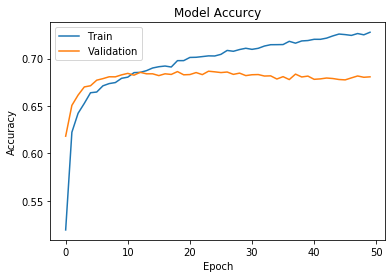

In [43]:
plt.plot(hist.history['acc'])
plt.plot(hist.history['val_acc'])
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.title('Model Accurcy')
plt.legend(['Train', 'Validation'])

Model seems to have high variance as train data accuracy deviates from test case. Early stop at around 30 epoch prevent the model from overfitting or add activity regularizer. Cross validation may help to improve variance without significantly changing the architecture of the model, however, it's an expensive technique to use

In [44]:
DNN.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 512)               53248     
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
activation_1 (Activation)    (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 256)               131328    
_________________________________________________________________
batch_normalization_1 (Batch (None, 256)               1024      
_________________________________________________________________
activation_2 (Activation)    (None, 256)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 128)               32896     
__________

In [45]:
#write function to reverse encode
def ReverseEncode(y_train, y_train_deep):
    check = {}
    y_train = y_train.reset_index()
    for ind, i in enumerate(y_train_deep):
        if len(check) != 5:
            if np.argmax(i) not in check:
                check[np.argmax(i)]= y_train.iloc[ind,1]
        else:
            break
    return check

#reverse encode the y_train
check = ReverseEncode(y_train, y_train_deep)

In [46]:
#predict test case
predict = DNN.predict(X_test)

In [47]:
#change numerical categories to readable categories
def readable_predict(predict, check):
    predict_str = []
    for i in predict:
        ind = np.argmax(i)
        predict_str.append(check[ind])
    return predict_str

#transforming predict to original category
predict_str = readable_predict(predict, check)

In [48]:
print('Accuracy of Neural Network:', round(accuracy_score(y_test, predict_str), 3))

Accuracy of Neural Network: 0.678


The accuracy of the neural network aligns well within the range of the score achieved from val_acc

In [49]:
print(confusion_matrix(y_test, predict_str))

[[3891    0  161  562  231]
 [  15  358  127    9   29]
 [ 363   39 7727  466  331]
 [ 677    1  910 2040  222]
 [1279    0 1081  542  841]]


In [50]:
print(classification_report(y_test, predict_str))

                 precision    recall  f1-score   support

Adoption/Foster       0.63      0.80      0.70      4845
           Died       0.90      0.67      0.76       538
           Euth       0.77      0.87      0.82      8926
            Rto       0.56      0.53      0.55      3850
       Transfer       0.51      0.22      0.31      3743

       accuracy                           0.68     21902
      macro avg       0.67      0.62      0.63     21902
   weighted avg       0.66      0.68      0.66     21902



Deep learning achieved the highest score for Louisville dataset with an accuracy of 67.8%, highest euthanization precisiion at 0.77 and highest precision of euthanization is 0.63. The highest euthanization recall is at 0.89 with naive bayes.

## Machine Learning on Dallas
<a id='Dallas'></a>

In [51]:
#isolate the dallas dataset
df_dalla.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25072 entries, 131807 to 157849
Data columns (total 13 columns):
Breed             25072 non-null object
Chip_Status       25072 non-null object
Health            24819 non-null object
Intake_Status     0 non-null object
Intake_Subtype    24704 non-null object
Location          25072 non-null object
Outcome_Type      25072 non-null object
Sex               0 non-null object
Neutered/Spay     25072 non-null object
Pure/Mix          25072 non-null object
Age               0 non-null float64
Outcome_Month     25072 non-null object
Intake_month      25072 non-null object
dtypes: float64(1), object(12)
memory usage: 2.7+ MB


In [52]:
#drop unused columns
df_dalla = df_dalla.drop(columns = ['Sex', 'Neutered/Spay', 'Age', 'Location', 'Intake_Status'])

In [53]:
df_dalla = df_dalla.dropna()
df_dalla.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24669 entries, 131807 to 157849
Data columns (total 8 columns):
Breed             24669 non-null object
Chip_Status       24669 non-null object
Health            24669 non-null object
Intake_Subtype    24669 non-null object
Outcome_Type      24669 non-null object
Pure/Mix          24669 non-null object
Outcome_Month     24669 non-null object
Intake_month      24669 non-null object
dtypes: object(8)
memory usage: 1.7+ MB


In [54]:
#split data into train and test
X = df_dalla.drop(columns = ['Outcome_Type'])
y = df_dalla.Outcome_Type

#encode categories
ohe = OneHotEncoder()
X = ohe.fit_transform(X)

#split dataset to train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 12, test_size = 0.3)

In [55]:
NB = BernoulliNB()
param_grid = {'alpha': np.logspace(-3,0, num = 50)}
NB_cv = RandomizedSearchCV(NB, param_grid, cv = 3, verbose = 15, n_iter = 10, 
                           scoring = 'accuracy', random_state = 12, n_jobs =4)
NB_cv.fit(X_train, y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   1 tasks      | elapsed:    8.4s
[Parallel(n_jobs=4)]: Done   2 tasks      | elapsed:    8.4s
[Parallel(n_jobs=4)]: Done   3 tasks      | elapsed:    8.4s
[Parallel(n_jobs=4)]: Done   4 tasks      | elapsed:    8.4s
[Parallel(n_jobs=4)]: Done   5 tasks      | elapsed:    8.6s
[Parallel(n_jobs=4)]: Done   6 tasks      | elapsed:    8.6s
[Parallel(n_jobs=4)]: Done   7 tasks      | elapsed:    8.6s
[Parallel(n_jobs=4)]: Done   8 tasks      | elapsed:    8.6s
[Parallel(n_jobs=4)]: Done   9 tasks      | elapsed:    8.8s
[Parallel(n_jobs=4)]: Done  10 tasks      | elapsed:    8.8s
[Parallel(n_jobs=4)]: Done  11 tasks      | elapsed:    8.8s
[Parallel(n_jobs=4)]: Done  12 tasks      | elapsed:    8.8s
[Parallel(n_jobs=4)]: Done  13 tasks      | elapsed:    8.9s
[Parallel(n_jobs=4)]: Done  14 tasks      | elapsed:    8.9s
[Parallel(n_jobs=4)]: Done  15 tasks      | elapsed:    8.9s
[Parallel(

RandomizedSearchCV(cv=3, error_score='raise-deprecating',
                   estimator=BernoulliNB(alpha=1.0, binarize=0.0,
                                         class_prior=None, fit_prior=True),
                   iid='warn', n_iter=10, n_jobs=4,
                   param_distributions={'alpha': array([0.001     , 0.0011514 , 0.00132571, 0.00152642, 0.00175751,
       0.00202359, 0.00232995, 0.0026827 , 0.00308884, 0.00355648,
       0.00409492, 0.00471487, 0.00542868, 0.00625055, 0.0...
       0.03393222, 0.0390694 , 0.04498433, 0.05179475, 0.05963623,
       0.06866488, 0.07906043, 0.09102982, 0.10481131, 0.12067926,
       0.13894955, 0.15998587, 0.184207  , 0.21209509, 0.24420531,
       0.28117687, 0.32374575, 0.37275937, 0.42919343, 0.49417134,
       0.5689866 , 0.65512856, 0.75431201, 0.86851137, 1.        ])},
                   pre_dispatch='2*n_jobs', random_state=12, refit=True,
                   return_train_score=False, scoring='accuracy', verbose=15)

In [56]:
print('Best alpha:', NB_cv.best_params_)

Best alpha: {'alpha': 0.868511373751352}


In [57]:
print('Best Score:', NB_cv.best_score_)

Best Score: 0.5187051192958073


In [58]:
print('Performance of naive bayes on test:', NB_cv.score(X_test, y_test))

Performance of naive bayes on test: 0.5197946223483313


In [59]:
y_pred = NB_cv.predict(X_test)
confusion_matrix(y_test, y_pred)

array([[1808,    0,   73,  166,  559],
       [   2,   68,   27,    0,    2],
       [ 523,    0, 1008,   54,  103],
       [ 412,    0,  169,  382,  346],
       [ 818,    0,  163,  137,  581]], dtype=int64)

In [60]:
print(classification_report(y_test, y_pred))

                 precision    recall  f1-score   support

Adoption/Foster       0.51      0.69      0.59      2606
           Died       1.00      0.69      0.81        99
           Euth       0.70      0.60      0.64      1688
            Rto       0.52      0.29      0.37      1309
       Transfer       0.37      0.34      0.35      1699

       accuracy                           0.52      7401
      macro avg       0.62      0.52      0.55      7401
   weighted avg       0.53      0.52      0.51      7401



In [61]:
#run logistic regression with random search cross validation and hypertuning
lm = LogisticRegression(solver = 'lbfgs', multi_class = 'ovr')
param_grid = {'C': np.logspace(-3, 0, num = 50)}
lm_cv = RandomizedSearchCV(lm, param_grid, cv = 3, verbose = 15, n_iter = 10, n_jobs = 4,
                           scoring = 'accuracy', random_state = 12)
lm_cv.fit(X_train, y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   1 tasks      | elapsed:    5.3s
[Parallel(n_jobs=4)]: Done   2 tasks      | elapsed:    5.4s
[Parallel(n_jobs=4)]: Done   3 tasks      | elapsed:    5.4s
[Parallel(n_jobs=4)]: Done   4 tasks      | elapsed:    5.9s
[Parallel(n_jobs=4)]: Done   5 tasks      | elapsed:    6.4s
[Parallel(n_jobs=4)]: Done   6 tasks      | elapsed:    6.7s
[Parallel(n_jobs=4)]: Done   7 tasks      | elapsed:    6.8s
[Parallel(n_jobs=4)]: Done   8 tasks      | elapsed:    7.2s
[Parallel(n_jobs=4)]: Done   9 tasks      | elapsed:    7.3s
[Parallel(n_jobs=4)]: Done  10 tasks      | elapsed:    8.2s
[Parallel(n_jobs=4)]: Done  11 tasks      | elapsed:    8.3s
[Parallel(n_jobs=4)]: Done  12 tasks      | elapsed:    8.5s
[Parallel(n_jobs=4)]: Done  13 tasks      | elapsed:    8.7s
[Parallel(n_jobs=4)]: Done  14 tasks      | elapsed:    9.3s
[Parallel(n_jobs=4)]: Done  15 tasks      | elapsed:    9.4s
[Parallel(

RandomizedSearchCV(cv=3, error_score='raise-deprecating',
                   estimator=LogisticRegression(C=1.0, class_weight=None,
                                                dual=False, fit_intercept=True,
                                                intercept_scaling=1,
                                                l1_ratio=None, max_iter=100,
                                                multi_class='ovr', n_jobs=None,
                                                penalty='l2', random_state=None,
                                                solver='lbfgs', tol=0.0001,
                                                verbose=0, warm_start=False),
                   iid='warn', n_iter=10, n_jobs=4,
                   param_distributions...
       0.03393222, 0.0390694 , 0.04498433, 0.05179475, 0.05963623,
       0.06866488, 0.07906043, 0.09102982, 0.10481131, 0.12067926,
       0.13894955, 0.15998587, 0.184207  , 0.21209509, 0.24420531,
       0.28117687, 0.32374575, 0

In [62]:
print('Best C:', lm_cv.best_params_)

Best C: {'C': 0.655128556859551}


In [63]:
print('Best Score:', lm_cv.best_score_)

Best Score: 0.5331248552235348


In [64]:
print('Performance of logistic regression on test:', lm_cv.score(X_test,y_test))

Performance of logistic regression on test: 0.5379002837454399


In [65]:
y_pred = lm_cv.predict(X_test)
confusion_matrix(y_test, y_pred)

array([[2109,    0,   99,  170,  228],
       [   4,   68,   27,    0,    0],
       [ 562,    0,  999,   89,   38],
       [ 561,    0,  112,  492,  144],
       [1078,    0,  158,  150,  313]], dtype=int64)

In [66]:
print(classification_report(y_test, y_pred))

                 precision    recall  f1-score   support

Adoption/Foster       0.49      0.81      0.61      2606
           Died       1.00      0.69      0.81        99
           Euth       0.72      0.59      0.65      1688
            Rto       0.55      0.38      0.45      1309
       Transfer       0.43      0.18      0.26      1699

       accuracy                           0.54      7401
      macro avg       0.64      0.53      0.56      7401
   weighted avg       0.54      0.54      0.51      7401



In [67]:
svm = SVC(kernel = 'linear')
param_grid = {'C': np.logspace(-3,0, num = 50)}
svm_cv = RandomizedSearchCV(svm, param_grid, cv = 3, verbose = 15, random_state = 10, 
                            scoring = 'accuracy', n_iter = 6, n_jobs = 4)
svm_cv.fit(X_train, y_train)

Fitting 3 folds for each of 6 candidates, totalling 18 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   1 tasks      | elapsed:   29.0s
[Parallel(n_jobs=4)]: Done   2 tasks      | elapsed:   29.3s
[Parallel(n_jobs=4)]: Done   3 tasks      | elapsed:   29.6s
[Parallel(n_jobs=4)]: Done   4 tasks      | elapsed:   30.4s
[Parallel(n_jobs=4)]: Done   5 tasks      | elapsed:   55.5s
[Parallel(n_jobs=4)]: Done   6 tasks      | elapsed:   55.6s
[Parallel(n_jobs=4)]: Done   7 tasks      | elapsed:   56.0s
[Parallel(n_jobs=4)]: Done   8 tasks      | elapsed:   56.8s
[Parallel(n_jobs=4)]: Done   9 tasks      | elapsed:  1.4min
[Parallel(n_jobs=4)]: Done  10 tasks      | elapsed:  1.4min
[Parallel(n_jobs=4)]: Done  11 tasks      | elapsed:  1.4min
[Parallel(n_jobs=4)]: Done  13 out of  18 | elapsed:  1.8min remaining:   41.2s
[Parallel(n_jobs=4)]: Done  15 out of  18 | elapsed:  1.8min remaining:   21.5s
[Parallel(n_jobs=4)]: Done  18 out of  18 | elapsed:  2.1min finished


RandomizedSearchCV(cv=3, error_score='raise-deprecating',
                   estimator=SVC(C=1.0, cache_size=200, class_weight=None,
                                 coef0=0.0, decision_function_shape='ovr',
                                 degree=3, gamma='auto_deprecated',
                                 kernel='linear', max_iter=-1,
                                 probability=False, random_state=None,
                                 shrinking=True, tol=0.001, verbose=False),
                   iid='warn', n_iter=6, n_jobs=4,
                   param_distributions={'C': array([0.0...
       0.03393222, 0.0390694 , 0.04498433, 0.05179475, 0.05963623,
       0.06866488, 0.07906043, 0.09102982, 0.10481131, 0.12067926,
       0.13894955, 0.15998587, 0.184207  , 0.21209509, 0.24420531,
       0.28117687, 0.32374575, 0.37275937, 0.42919343, 0.49417134,
       0.5689866 , 0.65512856, 0.75431201, 0.86851137, 1.        ])},
                   pre_dispatch='2*n_jobs', random_state=10, refit

In [68]:
print('Best parameters:', svm_cv.best_params_)

Best parameters: {'C': 0.3727593720314938}


In [69]:
print('Best Score:', svm_cv.best_score_)

Best Score: 0.5227009497336113


In [70]:
print('Performance of SVM on test:', svm_cv.score(X_test,y_test))

Performance of SVM on test: 0.5230374273746791


In [71]:
y_pred = svm_cv.predict(X_test)
confusion_matrix(y_test, y_pred)

array([[2403,    0,   32,  140,   31],
       [   4,   68,   27,    0,    0],
       [ 663,    0,  905,   84,   36],
       [ 797,    0,   83,  399,   30],
       [1383,    0,  110,  110,   96]], dtype=int64)

In [72]:
print(classification_report(y_test, y_pred))

                 precision    recall  f1-score   support

Adoption/Foster       0.46      0.92      0.61      2606
           Died       1.00      0.69      0.81        99
           Euth       0.78      0.54      0.64      1688
            Rto       0.54      0.30      0.39      1309
       Transfer       0.50      0.06      0.10      1699

       accuracy                           0.52      7401
      macro avg       0.66      0.50      0.51      7401
   weighted avg       0.56      0.52      0.46      7401



In [73]:
#run kNN classifier 
knn = KNeighborsClassifier(weights = 'uniform', algorithm = 'kd_tree')
param_grid = {'n_neighbors': np.arange(1,25)}
knn_cv = RandomizedSearchCV(knn, param_grid, cv = 3, n_jobs = 4, 
                            verbose = 2, random_state =12, n_iter = 8, scoring = 'accuracy')
knn_cv.fit(X_train,y_train)

Fitting 3 folds for each of 8 candidates, totalling 24 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  24 out of  24 | elapsed:  1.5min finished
C:\Users\sadmin\Anaconda3\lib\site-packages\sklearn\neighbors\base.py:216: UserWarning: cannot use tree with sparse input: using brute force
  warnings.warn("cannot use tree with sparse input: "


RandomizedSearchCV(cv=3, error_score='raise-deprecating',
                   estimator=KNeighborsClassifier(algorithm='kd_tree',
                                                  leaf_size=30,
                                                  metric='minkowski',
                                                  metric_params=None,
                                                  n_jobs=None, n_neighbors=5,
                                                  p=2, weights='uniform'),
                   iid='warn', n_iter=8, n_jobs=4,
                   param_distributions={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24])},
                   pre_dispatch='2*n_jobs', random_state=12, refit=True,
                   return_train_score=False, scoring='accuracy', verbose=2)

In [74]:
print('Best k neighbors:', knn_cv.best_params_)

Best k neighbors: {'n_neighbors': 24}


In [75]:
print('Best Score:', knn_cv.best_score_)

Best Score: 0.5180101922631457


In [76]:
print('Performance of k nearest neighbor:', knn_cv.score(X_test, y_test))

Performance of k nearest neighbor: 0.5243885961356574


In [77]:
y_pred = knn_cv.predict(X_test)
confusion_matrix(y_test, y_pred)

array([[1878,    0,  149,  223,  356],
       [   3,    4,   90,    0,    2],
       [ 492,    0, 1038,   82,   76],
       [ 512,    0,  161,  522,  114],
       [ 928,    0,  153,  179,  439]], dtype=int64)

In [78]:
print(classification_report(y_test, y_pred))

                 precision    recall  f1-score   support

Adoption/Foster       0.49      0.72      0.59      2606
           Died       1.00      0.04      0.08        99
           Euth       0.65      0.61      0.63      1688
            Rto       0.52      0.40      0.45      1309
       Transfer       0.44      0.26      0.33      1699

       accuracy                           0.52      7401
      macro avg       0.62      0.41      0.41      7401
   weighted avg       0.53      0.52      0.51      7401



In [79]:
#run random Forest with Grid Search with hyperparameter tuning
RF = RandomForestClassifier(random_state = 10)
param_grid = {'n_estimators': [100, 200, 400, 600, 800, 1000]}
RF_cv = GridSearchCV(RF, param_grid, cv = 3, verbose = 15, n_jobs = 4, scoring = 'accuracy')
RF_cv.fit(X_train, y_train)

Fitting 3 folds for each of 6 candidates, totalling 18 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   1 tasks      | elapsed:   23.5s
[Parallel(n_jobs=4)]: Done   2 tasks      | elapsed:   23.9s
[Parallel(n_jobs=4)]: Done   3 tasks      | elapsed:   23.9s
[Parallel(n_jobs=4)]: Done   4 tasks      | elapsed:   38.3s
[Parallel(n_jobs=4)]: Done   5 tasks      | elapsed:   52.1s
[Parallel(n_jobs=4)]: Done   6 tasks      | elapsed:   53.1s
[Parallel(n_jobs=4)]: Done   7 tasks      | elapsed:  1.4min
[Parallel(n_jobs=4)]: Done   8 tasks      | elapsed:  1.6min
[Parallel(n_jobs=4)]: Done   9 tasks      | elapsed:  1.8min
[Parallel(n_jobs=4)]: Done  10 tasks      | elapsed:  2.3min
[Parallel(n_jobs=4)]: Done  11 tasks      | elapsed:  2.8min
[Parallel(n_jobs=4)]: Done  13 out of  18 | elapsed:  3.8min remaining:  1.4min
[Parallel(n_jobs=4)]: Done  15 out of  18 | elapsed:  4.7min remaining:   56.6s
[Parallel(n_jobs=4)]: Done  18 out of  18 | elapsed:  6.1min finished


GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False, random_state=10,
                                              verbose=0, warm_start=False),
             iid='warn', n_jobs=4,
             param_grid={'n_e

In [80]:
print('Best # of trees in a forest:', RF_cv.best_params_)

Best # of trees in a forest: {'n_estimators': 800}


In [81]:
print('Best Score:', RF_cv.best_score_)

Best Score: 0.5424484595784109


In [82]:
print('Performance of random forest: ', RF_cv.score(X_test,y_test))

Performance of random forest:  0.5472233481961897


In [83]:
y_pred = RF_cv.predict(X_test)
confusion_matrix(y_test, y_pred)

array([[1732,    4,  192,  261,  417],
       [   4,   68,   24,    0,    3],
       [ 423,    4, 1048,   95,  118],
       [ 381,    0,  125,  673,  130],
       [ 816,    3,  147,  204,  529]], dtype=int64)

In [84]:
print(classification_report(y_test, y_pred))

                 precision    recall  f1-score   support

Adoption/Foster       0.52      0.66      0.58      2606
           Died       0.86      0.69      0.76        99
           Euth       0.68      0.62      0.65      1688
            Rto       0.55      0.51      0.53      1309
       Transfer       0.44      0.31      0.37      1699

       accuracy                           0.55      7401
      macro avg       0.61      0.56      0.58      7401
   weighted avg       0.55      0.55      0.54      7401



In [85]:
#encode the y_train 
y_train_deep = OneHotEncoder().fit_transform(y_train.values.reshape(-1,1))

#define X_train shape
in_dim = X_train.shape[1]

In [86]:
DNN = Sequential()

DNN.add(Dense(512, input_shape = (in_dim,)))
DNN.add(Dropout(0.4))
DNN.add(Activation('relu'))

DNN.add(Dense(256))
DNN.add(BatchNormalization())
DNN.add(Activation('relu'))

DNN.add(Dense(128))
DNN.add(Dropout(0.4))
DNN.add(Activation('relu'))

DNN.add(Dense(64))
DNN.add(BatchNormalization())
DNN.add(Activation('relu'))

DNN.add(Dense(32))
DNN.add(Dropout(0.4))
DNN.add(Activation('relu'))
    
DNN.add(Dense(16))
DNN.add(BatchNormalization())
DNN.add(Activation('relu'))

DNN.add(Dense(5))
DNN.add(Activation('softmax'))
    
DNN.compile(optimizer = 'Adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])
hist = DNN.fit(X_train, y_train_deep, validation_split = 0.3, batch_size = 256, epochs = 50, verbose = 2)

Train on 12087 samples, validate on 5181 samples
Epoch 1/50
 - 6s - loss: 1.5696 - acc: 0.3230 - val_loss: 1.4133 - val_acc: 0.4028
Epoch 2/50
 - 2s - loss: 1.3146 - acc: 0.4524 - val_loss: 1.2555 - val_acc: 0.4802
Epoch 3/50
 - 2s - loss: 1.2380 - acc: 0.4814 - val_loss: 1.1780 - val_acc: 0.5022
Epoch 4/50
 - 2s - loss: 1.1893 - acc: 0.4962 - val_loss: 1.1312 - val_acc: 0.5163
Epoch 5/50
 - 2s - loss: 1.1543 - acc: 0.5042 - val_loss: 1.1094 - val_acc: 0.5252
Epoch 6/50
 - 2s - loss: 1.1354 - acc: 0.5114 - val_loss: 1.0893 - val_acc: 0.5294
Epoch 7/50
 - 2s - loss: 1.1201 - acc: 0.5187 - val_loss: 1.0815 - val_acc: 0.5283
Epoch 8/50
 - 2s - loss: 1.1100 - acc: 0.5190 - val_loss: 1.0734 - val_acc: 0.5323
Epoch 9/50
 - 1s - loss: 1.0973 - acc: 0.5243 - val_loss: 1.0672 - val_acc: 0.5368
Epoch 10/50
 - 1s - loss: 1.0864 - acc: 0.5259 - val_loss: 1.0652 - val_acc: 0.5327
Epoch 11/50
 - 1s - loss: 1.0790 - acc: 0.5315 - val_loss: 1.0622 - val_acc: 0.5327
Epoch 12/50
 - 1s - loss: 1.0728 - a

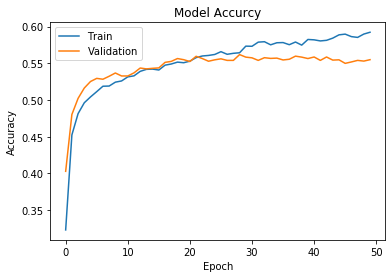

In [87]:
plt.plot(hist.history['acc'])
plt.plot(hist.history['val_acc'])
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.title('Model Accurcy')
plt.legend(['Train', 'Validation'])

In [88]:
DNN.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 512)               30720     
_________________________________________________________________
dropout_4 (Dropout)          (None, 512)               0         
_________________________________________________________________
activation_8 (Activation)    (None, 512)               0         
_________________________________________________________________
dense_9 (Dense)              (None, 256)               131328    
_________________________________________________________________
batch_normalization_4 (Batch (None, 256)               1024      
_________________________________________________________________
activation_9 (Activation)    (None, 256)               0         
_________________________________________________________________
dense_10 (Dense)             (None, 128)               32896     
__________

In [89]:
#reverse encode the y_train
check = ReverseEncode(y_train, y_train_deep)

In [90]:
#predict test case
predict = DNN.predict(X_test)

In [91]:
predict_str = readable_predict(predict, check)

In [92]:
print('Accuracy of Neural Network:', round(accuracy_score( y_test, predict_str), 3))

Accuracy of Neural Network: 0.56


In [93]:
print(confusion_matrix(y_test, predict_str))

[[1931    4  105  321  245]
 [   3   68   25    2    1]
 [ 506    4 1002  103   73]
 [ 370    1  101  748   89]
 [ 945    2  123  231  398]]


In [94]:
print(classification_report(y_test, predict_str))

                 precision    recall  f1-score   support

Adoption/Foster       0.51      0.74      0.61      2606
           Died       0.86      0.69      0.76        99
           Euth       0.74      0.59      0.66      1688
            Rto       0.53      0.57      0.55      1309
       Transfer       0.49      0.23      0.32      1699

       accuracy                           0.56      7401
      macro avg       0.63      0.57      0.58      7401
   weighted avg       0.57      0.56      0.54      7401



Deep learning have overall the best accuracy at 56% and Random forest has the best euthanization recall at 0.65. SVM has the highest precision of euthanization at 0.78. Random Forest has the best adoption precision at 0.52.

## Machine Learning on Austin
<a id='Aust'></a>

In [95]:
df_aust.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 55035 entries, 0 to 55053
Data columns (total 13 columns):
Breed             55035 non-null object
Chip_Status       0 non-null object
Health            0 non-null object
Intake_Status     0 non-null object
Intake_Subtype    0 non-null object
Location          55035 non-null object
Outcome_Type      55035 non-null object
Sex               55034 non-null object
Neutered/Spay     55035 non-null object
Pure/Mix          55035 non-null object
Age               55035 non-null float64
Outcome_Month     55035 non-null object
Intake_month      55035 non-null object
dtypes: float64(1), object(12)
memory usage: 5.9+ MB


In [96]:
#set features and target variables
df_aust = df_aust.drop(columns = ['Health', 'Chip_Status', 'Intake_Status', 'Location', 'Intake_Subtype'])
df_aust = df_aust.dropna()
y = df_aust.Outcome_Type

In [97]:
df_aust.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 55034 entries, 0 to 55053
Data columns (total 8 columns):
Breed            55034 non-null object
Outcome_Type     55034 non-null object
Sex              55034 non-null object
Neutered/Spay    55034 non-null object
Pure/Mix         55034 non-null object
Age              55034 non-null float64
Outcome_Month    55034 non-null object
Intake_month     55034 non-null object
dtypes: float64(1), object(7)
memory usage: 3.8+ MB


In [98]:
#convert categorical features to numerical
# create temp dataframe to encode
temp1 = categorize(df_aust.Age)
cat_df_aust = df_aust.drop(columns = ['Age', 'Outcome_Type'])
cat_df_aust['Age'] = temp1

#initialize onehotencoder and scaler
ohe = OneHotEncoder(sparse = False)

#transform and concatenate data
cat_df_aust = ohe.fit_transform(cat_df_aust)

#assigning target and features
X = cat_df_aust

X_train, X_test, y_train, y_test = train_test_split(X,y, random_state = 10, test_size = .3)

In [99]:
NB = BernoulliNB()
param_grid = {'alpha': np.logspace(-3, 0, num = 50)}
NB_cv = RandomizedSearchCV(NB, param_grid, verbose = 15, n_jobs = 4, 
                           cv = 3, n_iter = 10, random_state = 12, scoring = 'accuracy')
NB_cv.fit(X_train, y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   1 tasks      | elapsed:    4.7s
[Parallel(n_jobs=4)]: Done   2 tasks      | elapsed:    4.8s
[Parallel(n_jobs=4)]: Done   3 tasks      | elapsed:    4.9s
[Parallel(n_jobs=4)]: Done   4 tasks      | elapsed:    5.2s
[Parallel(n_jobs=4)]: Done   5 tasks      | elapsed:    5.3s
[Parallel(n_jobs=4)]: Done   6 tasks      | elapsed:    5.3s
[Parallel(n_jobs=4)]: Done   7 tasks      | elapsed:    5.4s
[Parallel(n_jobs=4)]: Done   8 tasks      | elapsed:    5.7s
[Parallel(n_jobs=4)]: Done   9 tasks      | elapsed:    5.7s
[Parallel(n_jobs=4)]: Done  10 tasks      | elapsed:    5.8s
[Parallel(n_jobs=4)]: Done  11 tasks      | elapsed:    5.8s
[Parallel(n_jobs=4)]: Done  12 tasks      | elapsed:    6.1s
[Parallel(n_jobs=4)]: Done  13 tasks      | elapsed:    6.2s
[Parallel(n_jobs=4)]: Done  14 tasks      | elapsed:    6.2s
[Parallel(n_jobs=4)]: Done  15 tasks      | elapsed:    6.2s
[Parallel(

RandomizedSearchCV(cv=3, error_score='raise-deprecating',
                   estimator=BernoulliNB(alpha=1.0, binarize=0.0,
                                         class_prior=None, fit_prior=True),
                   iid='warn', n_iter=10, n_jobs=4,
                   param_distributions={'alpha': array([0.001     , 0.0011514 , 0.00132571, 0.00152642, 0.00175751,
       0.00202359, 0.00232995, 0.0026827 , 0.00308884, 0.00355648,
       0.00409492, 0.00471487, 0.00542868, 0.00625055, 0.0...
       0.03393222, 0.0390694 , 0.04498433, 0.05179475, 0.05963623,
       0.06866488, 0.07906043, 0.09102982, 0.10481131, 0.12067926,
       0.13894955, 0.15998587, 0.184207  , 0.21209509, 0.24420531,
       0.28117687, 0.32374575, 0.37275937, 0.42919343, 0.49417134,
       0.5689866 , 0.65512856, 0.75431201, 0.86851137, 1.        ])},
                   pre_dispatch='2*n_jobs', random_state=12, refit=True,
                   return_train_score=False, scoring='accuracy', verbose=15)

In [100]:
print('Best alpha:', NB_cv.best_params_)

Best alpha: {'alpha': 0.05963623316594643}


In [101]:
print('Best Score:', NB_cv.best_score_)

Best Score: 0.5778885341224723


In [102]:
print('Performance of naive bayes on test:', NB_cv.score(X_test, y_test))

Performance of naive bayes on test: 0.5792501968384713


In [103]:
y_pred = NB_cv.predict(X_test)
confusion_matrix(y_test, y_pred)

array([[6585,    0,    2,  852,  189],
       [  10,    1,    0,    8,   39],
       [ 147,    1,    6,  158,  185],
       [2334,    0,   17, 1464,  990],
       [1431,    7,   11,  566, 1508]], dtype=int64)

In [104]:
print(classification_report(y_test, y_pred))

                 precision    recall  f1-score   support

Adoption/Foster       0.63      0.86      0.73      7628
           Died       0.11      0.02      0.03        58
           Euth       0.17      0.01      0.02       497
            Rto       0.48      0.30      0.37      4805
       Transfer       0.52      0.43      0.47      3523

       accuracy                           0.58     16511
      macro avg       0.38      0.33      0.32     16511
   weighted avg       0.55      0.58      0.54     16511



In [105]:
# create temp dataframe to encode and scale
temp1 = df_aust.Age.values.reshape(-1,1)
temp2 = df_aust.drop(columns=['Age', 'Outcome_Type'])

#initialize onehotencoder and scaler
ohe = OneHotEncoder(sparse = False)
scaler = StandardScaler()

#transform and concatenate data
temp1 = scaler.fit_transform(temp1)
temp2 = ohe.fit_transform(temp2)

#assigning target and features
y = df_aust.Outcome_Type
X = np.concatenate((temp1,temp2), axis = 1)

X_train, X_test, y_train, y_test = train_test_split(X,y, random_state = 10, test_size = .3)

In [106]:
#run logistic regression with random search cross validation and hypertuning
lm = LogisticRegression(solver = 'lbfgs', multi_class = 'ovr')
param_grid = {'C': np.logspace(-3, 0, num = 50)}
lm_cv = RandomizedSearchCV(lm, param_grid, cv = 3, verbose = 15, n_jobs = 4,
                           n_iter = 10, scoring = 'accuracy', random_state = 12)
lm_cv.fit(X_train, y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   1 tasks      | elapsed:    6.6s
[Parallel(n_jobs=4)]: Done   2 tasks      | elapsed:    6.6s
[Parallel(n_jobs=4)]: Done   3 tasks      | elapsed:    6.6s
[Parallel(n_jobs=4)]: Done   4 tasks      | elapsed:    7.3s
[Parallel(n_jobs=4)]: Done   5 tasks      | elapsed:    8.1s
[Parallel(n_jobs=4)]: Done   6 tasks      | elapsed:    8.8s
[Parallel(n_jobs=4)]: Done   7 tasks      | elapsed:    9.1s
[Parallel(n_jobs=4)]: Done   8 tasks      | elapsed:    9.4s
[Parallel(n_jobs=4)]: Done   9 tasks      | elapsed:    9.4s
[Parallel(n_jobs=4)]: Done  10 tasks      | elapsed:   11.6s
[Parallel(n_jobs=4)]: Done  11 tasks      | elapsed:   11.6s
[Parallel(n_jobs=4)]: Done  12 tasks      | elapsed:   11.9s
[Parallel(n_jobs=4)]: Done  13 tasks      | elapsed:   11.9s
[Parallel(n_jobs=4)]: Done  14 tasks      | elapsed:   13.9s
[Parallel(n_jobs=4)]: Done  15 tasks      | elapsed:   13.9s
[Parallel(

RandomizedSearchCV(cv=3, error_score='raise-deprecating',
                   estimator=LogisticRegression(C=1.0, class_weight=None,
                                                dual=False, fit_intercept=True,
                                                intercept_scaling=1,
                                                l1_ratio=None, max_iter=100,
                                                multi_class='ovr', n_jobs=None,
                                                penalty='l2', random_state=None,
                                                solver='lbfgs', tol=0.0001,
                                                verbose=0, warm_start=False),
                   iid='warn', n_iter=10, n_jobs=4,
                   param_distributions...
       0.03393222, 0.0390694 , 0.04498433, 0.05179475, 0.05963623,
       0.06866488, 0.07906043, 0.09102982, 0.10481131, 0.12067926,
       0.13894955, 0.15998587, 0.184207  , 0.21209509, 0.24420531,
       0.28117687, 0.32374575, 0

In [107]:
print('Best C:', lm_cv.best_params_)

Best C: {'C': 0.655128556859551}


In [108]:
print('Best Score:', lm_cv.best_score_)

Best Score: 0.5901669132725904


In [109]:
print('Performance of logistic regression on test:', lm_cv.score(X_test,y_test))

Performance of logistic regression on test: 0.5900914541820604


In [110]:
y_pred = lm_cv.predict(X_test)
confusion_matrix(y_test, y_pred)

array([[6787,    0,    0,  666,  175],
       [  10,    0,    0,    9,   39],
       [ 143,    0,    0,  220,  134],
       [2425,    0,    0, 1502,  878],
       [1535,    0,    0,  534, 1454]], dtype=int64)

In [111]:
print(classification_report(y_test, y_pred))

C:\Users\sadmin\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


                 precision    recall  f1-score   support

Adoption/Foster       0.62      0.89      0.73      7628
           Died       0.00      0.00      0.00        58
           Euth       0.00      0.00      0.00       497
            Rto       0.51      0.31      0.39      4805
       Transfer       0.54      0.41      0.47      3523

       accuracy                           0.59     16511
      macro avg       0.34      0.32      0.32     16511
   weighted avg       0.55      0.59      0.55     16511



In [112]:
svm = SVC(kernel = 'linear')
param_grid = {'C': np.logspace(-3,0, num = 50)}
svm_cv = RandomizedSearchCV(svm, param_grid, cv = 3, n_jobs = 4,
                            verbose = 15, random_state = 10, scoring = 'accuracy', n_iter = 6)
svm_cv.fit(X_train, y_train)

Fitting 3 folds for each of 6 candidates, totalling 18 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   1 tasks      | elapsed:  3.6min
[Parallel(n_jobs=4)]: Done   2 tasks      | elapsed:  3.7min
[Parallel(n_jobs=4)]: Done   3 tasks      | elapsed:  3.7min
[Parallel(n_jobs=4)]: Done   4 tasks      | elapsed:  3.7min
[Parallel(n_jobs=4)]: Done   5 tasks      | elapsed:  7.0min
[Parallel(n_jobs=4)]: Done   6 tasks      | elapsed:  7.2min
[Parallel(n_jobs=4)]: Done   7 tasks      | elapsed:  7.4min
[Parallel(n_jobs=4)]: Done   8 tasks      | elapsed:  7.4min
[Parallel(n_jobs=4)]: Done   9 tasks      | elapsed: 10.7min
[Parallel(n_jobs=4)]: Done  10 tasks      | elapsed: 10.8min
[Parallel(n_jobs=4)]: Done  11 tasks      | elapsed: 11.0min
[Parallel(n_jobs=4)]: Done  13 out of  18 | elapsed: 14.4min remaining:  5.5min
[Parallel(n_jobs=4)]: Done  15 out of  18 | elapsed: 14.5min remaining:  2.9min
[Parallel(n_jobs=4)]: Done  18 out of  18 | elapsed: 16.4min finished


RandomizedSearchCV(cv=3, error_score='raise-deprecating',
                   estimator=SVC(C=1.0, cache_size=200, class_weight=None,
                                 coef0=0.0, decision_function_shape='ovr',
                                 degree=3, gamma='auto_deprecated',
                                 kernel='linear', max_iter=-1,
                                 probability=False, random_state=None,
                                 shrinking=True, tol=0.001, verbose=False),
                   iid='warn', n_iter=6, n_jobs=4,
                   param_distributions={'C': array([0.0...
       0.03393222, 0.0390694 , 0.04498433, 0.05179475, 0.05963623,
       0.06866488, 0.07906043, 0.09102982, 0.10481131, 0.12067926,
       0.13894955, 0.15998587, 0.184207  , 0.21209509, 0.24420531,
       0.28117687, 0.32374575, 0.37275937, 0.42919343, 0.49417134,
       0.5689866 , 0.65512856, 0.75431201, 0.86851137, 1.        ])},
                   pre_dispatch='2*n_jobs', random_state=10, refit

In [113]:
print('Best parameters:', svm_cv.best_params_)

Best parameters: {'C': 0.016768329368110083}


In [114]:
print('Best Score:', svm_cv.best_score_)

Best Score: 0.5767204007995224


In [115]:
print('Performance of SVM on test:', svm_cv.score(X_test,y_test))

Performance of SVM on test: 0.5801586820907274


In [116]:
y_pred = svm_cv.predict(X_test)
confusion_matrix(y_test, y_pred)

array([[6916,    0,    0,  514,  198],
       [  10,    0,    0,    5,   43],
       [ 164,    0,    0,  124,  209],
       [2556,    0,    0, 1058, 1191],
       [1581,    0,    0,  337, 1605]], dtype=int64)

In [117]:
print(classification_report(y_test, y_pred))

C:\Users\sadmin\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


                 precision    recall  f1-score   support

Adoption/Foster       0.62      0.91      0.73      7628
           Died       0.00      0.00      0.00        58
           Euth       0.00      0.00      0.00       497
            Rto       0.52      0.22      0.31      4805
       Transfer       0.49      0.46      0.47      3523

       accuracy                           0.58     16511
      macro avg       0.33      0.32      0.30     16511
   weighted avg       0.54      0.58      0.53     16511



In [118]:
#run kNN classifier 
knn = KNeighborsClassifier(weights = 'uniform', algorithm = 'kd_tree')
param_grid = {'n_neighbors': np.arange(1,25)}
knn_cv = RandomizedSearchCV(knn, param_grid, cv = 3, n_jobs = 4,
                            verbose = 15, random_state =12, n_iter = 8, scoring = 'accuracy')
knn_cv.fit(X_train,y_train)

Fitting 3 folds for each of 8 candidates, totalling 24 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   1 tasks      | elapsed:   38.3s
[Parallel(n_jobs=4)]: Done   2 tasks      | elapsed:   38.4s
[Parallel(n_jobs=4)]: Done   3 tasks      | elapsed:   38.9s
[Parallel(n_jobs=4)]: Done   4 tasks      | elapsed:   41.5s
[Parallel(n_jobs=4)]: Done   5 tasks      | elapsed:  1.0min
[Parallel(n_jobs=4)]: Done   6 tasks      | elapsed:  1.1min
[Parallel(n_jobs=4)]: Done   7 tasks      | elapsed:  1.2min
[Parallel(n_jobs=4)]: Done   8 tasks      | elapsed:  1.3min
[Parallel(n_jobs=4)]: Done   9 tasks      | elapsed:  1.4min
[Parallel(n_jobs=4)]: Done  10 tasks      | elapsed:  1.6min
[Parallel(n_jobs=4)]: Done  11 tasks      | elapsed:  1.7min
[Parallel(n_jobs=4)]: Done  12 tasks      | elapsed:  1.8min
[Parallel(n_jobs=4)]: Done  13 tasks      | elapsed:  1.8min
[Parallel(n_jobs=4)]: Done  14 tasks      | elapsed:  2.0min
[Parallel(n_jobs=4)]: Done  15 tasks      | elapsed:  2.2min
[Parallel(

RandomizedSearchCV(cv=3, error_score='raise-deprecating',
                   estimator=KNeighborsClassifier(algorithm='kd_tree',
                                                  leaf_size=30,
                                                  metric='minkowski',
                                                  metric_params=None,
                                                  n_jobs=None, n_neighbors=5,
                                                  p=2, weights='uniform'),
                   iid='warn', n_iter=8, n_jobs=4,
                   param_distributions={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24])},
                   pre_dispatch='2*n_jobs', random_state=12, refit=True,
                   return_train_score=False, scoring='accuracy', verbose=15)

In [119]:
print('Best k neighbors:', knn_cv.best_params_)

Best k neighbors: {'n_neighbors': 24}


In [120]:
print('Best Score:', knn_cv.best_score_)

Best Score: 0.5928406406562313


In [121]:
print('Performance of k nearest neighbor:', knn_cv.score(X_test, y_test))

Performance of k nearest neighbor: 0.5928774756223124


In [122]:
y_pred = knn_cv.predict(X_test)
confusion_matrix(y_test, y_pred)

array([[6532,    0,    0,  922,  174],
       [  10,    0,    0,   14,   34],
       [ 145,    0,    0,  234,  118],
       [2210,    0,    1, 1998,  596],
       [1475,    0,    1,  788, 1259]], dtype=int64)

In [123]:
print(classification_report(y_test, y_pred))

C:\Users\sadmin\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


                 precision    recall  f1-score   support

Adoption/Foster       0.63      0.86      0.73      7628
           Died       0.00      0.00      0.00        58
           Euth       0.00      0.00      0.00       497
            Rto       0.51      0.42      0.46      4805
       Transfer       0.58      0.36      0.44      3523

       accuracy                           0.59     16511
      macro avg       0.34      0.33      0.32     16511
   weighted avg       0.56      0.59      0.56     16511



In [124]:
#run random Forest with Grid Search with hyperparameter tuning
RF = RandomForestClassifier(random_state = 10)
param_grid = {'n_estimators': [100, 200, 400, 600, 800, 1000]}
RF_cv = GridSearchCV(RF, param_grid, cv = 3, n_jobs = 4, verbose = 15, scoring = 'accuracy')
RF_cv.fit(X_train, y_train)

Fitting 3 folds for each of 6 candidates, totalling 18 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   1 tasks      | elapsed:   14.7s
[Parallel(n_jobs=4)]: Done   2 tasks      | elapsed:   14.7s
[Parallel(n_jobs=4)]: Done   3 tasks      | elapsed:   14.9s
[Parallel(n_jobs=4)]: Done   4 tasks      | elapsed:   24.6s
[Parallel(n_jobs=4)]: Done   5 tasks      | elapsed:   34.1s
[Parallel(n_jobs=4)]: Done   6 tasks      | elapsed:   34.5s
[Parallel(n_jobs=4)]: Done   7 tasks      | elapsed:   53.4s
[Parallel(n_jobs=4)]: Done   8 tasks      | elapsed:  1.1min
[Parallel(n_jobs=4)]: Done   9 tasks      | elapsed:  1.2min
[Parallel(n_jobs=4)]: Done  10 tasks      | elapsed:  1.5min
[Parallel(n_jobs=4)]: Done  11 tasks      | elapsed:  1.9min
[Parallel(n_jobs=4)]: Done  13 out of  18 | elapsed:  2.5min remaining:   57.4s
[Parallel(n_jobs=4)]: Done  15 out of  18 | elapsed:  3.2min remaining:   38.5s
[Parallel(n_jobs=4)]: Done  18 out of  18 | elapsed:  4.1min finished


GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False, random_state=10,
                                              verbose=0, warm_start=False),
             iid='warn', n_jobs=4,
             param_grid={'n_e

In [125]:
print('Best # of trees in a forest:', RF_cv.best_params_)

Best # of trees in a forest: {'n_estimators': 400}


In [126]:
print('Best Score:', RF_cv.best_score_)

Best Score: 0.5373413285569659


In [127]:
print('Performance of random forest: ', RF_cv.score(X_test,y_test))

Performance of random forest:  0.5438192720004845


In [128]:
y_pred = RF_cv.predict(X_test)
confusion_matrix(y_test, y_pred)

array([[5167,    8,   82, 1375,  996],
       [   6,    3,    4,   20,   25],
       [ 116,    2,   28,  220,  131],
       [1412,   14,  192, 2352,  835],
       [1134,   12,   98,  850, 1429]], dtype=int64)

In [129]:
print(classification_report(y_test, y_pred))

                 precision    recall  f1-score   support

Adoption/Foster       0.66      0.68      0.67      7628
           Died       0.08      0.05      0.06        58
           Euth       0.07      0.06      0.06       497
            Rto       0.49      0.49      0.49      4805
       Transfer       0.42      0.41      0.41      3523

       accuracy                           0.54     16511
      macro avg       0.34      0.34      0.34     16511
   weighted avg       0.54      0.54      0.54     16511



In [130]:
#encode the y_train 
y_train_deep = OneHotEncoder().fit_transform(y_train.values.reshape(-1,1))

#define X_train shape
in_dim = X_train.shape[1]

In [131]:
DNN = Sequential()

DNN.add(Dense(512, input_shape = (in_dim,)))
DNN.add(Dropout(0.4))
DNN.add(Activation('relu'))

DNN.add(Dense(256))
DNN.add(BatchNormalization())
DNN.add(Activation('relu'))

DNN.add(Dense(128))
DNN.add(Dropout(0.4))
DNN.add(Activation('relu'))

DNN.add(Dense(64))
DNN.add(BatchNormalization())
DNN.add(Activation('relu'))

DNN.add(Dense(32))
DNN.add(Dropout(0.4))
DNN.add(Activation('relu'))
    
DNN.add(Dense(16))
DNN.add(BatchNormalization())
DNN.add(Activation('relu'))

DNN.add(Dense(5))
DNN.add(Activation('softmax'))
    
DNN.compile(optimizer = 'Adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])
hist = DNN.fit(X_train, y_train_deep, validation_split = 0.3, batch_size = 256, epochs = 50, verbose = 2)

Train on 26966 samples, validate on 11557 samples
Epoch 1/50
 - 6s - loss: 1.3466 - acc: 0.4865 - val_loss: 1.1756 - val_acc: 0.5880
Epoch 2/50
 - 3s - loss: 1.0748 - acc: 0.5827 - val_loss: 1.0179 - val_acc: 0.5955
Epoch 3/50
 - 3s - loss: 1.0120 - acc: 0.5897 - val_loss: 0.9880 - val_acc: 0.5963
Epoch 4/50
 - 3s - loss: 0.9926 - acc: 0.5923 - val_loss: 0.9748 - val_acc: 0.5970
Epoch 5/50
 - 3s - loss: 0.9821 - acc: 0.5930 - val_loss: 0.9689 - val_acc: 0.5953
Epoch 6/50
 - 3s - loss: 0.9771 - acc: 0.5948 - val_loss: 0.9654 - val_acc: 0.5974
Epoch 7/50
 - 3s - loss: 0.9729 - acc: 0.5976 - val_loss: 0.9629 - val_acc: 0.5977
Epoch 8/50
 - 3s - loss: 0.9670 - acc: 0.5968 - val_loss: 0.9612 - val_acc: 0.5983
Epoch 9/50
 - 3s - loss: 0.9636 - acc: 0.5985 - val_loss: 0.9593 - val_acc: 0.5985
Epoch 10/50
 - 3s - loss: 0.9628 - acc: 0.5997 - val_loss: 0.9599 - val_acc: 0.5992
Epoch 11/50
 - 3s - loss: 0.9595 - acc: 0.5994 - val_loss: 0.9595 - val_acc: 0.6002
Epoch 12/50
 - 3s - loss: 0.9591 - 

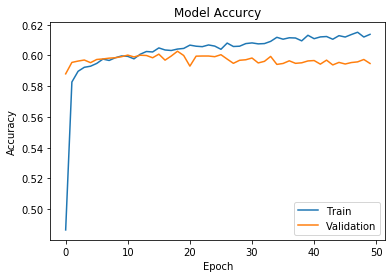

In [132]:
plt.plot(hist.history['acc'])
plt.plot(hist.history['val_acc'])
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.title('Model Accurcy')
plt.legend(['Train', 'Validation'])

Model seems to have high variance as train data accuracy deviates from test case. Cross validation may help to improve variance without significantly changing the architecture of the model

In [133]:
DNN.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_15 (Dense)             (None, 512)               16384     
_________________________________________________________________
dropout_7 (Dropout)          (None, 512)               0         
_________________________________________________________________
activation_15 (Activation)   (None, 512)               0         
_________________________________________________________________
dense_16 (Dense)             (None, 256)               131328    
_________________________________________________________________
batch_normalization_7 (Batch (None, 256)               1024      
_________________________________________________________________
activation_16 (Activation)   (None, 256)               0         
_________________________________________________________________
dense_17 (Dense)             (None, 128)               32896     
__________

In [134]:
#reverse encode the y_train
check = ReverseEncode(y_train, y_train_deep)

In [135]:
#predict test case
predict = DNN.predict(X_test)

In [136]:
#transforming predict to original category
predict_str = readable_predict(predict, check)

In [137]:
print('Accuracy of Neural Network:', round(accuracy_score(y_test, predict_str), 3))

Accuracy of Neural Network: 0.594


The accuracy of the neural network aligns will within the range of the score achieved from val_acc

In [138]:
print(confusion_matrix(y_test, predict_str))

[[6556    0    0  923  149]
 [   9    0    0   17   32]
 [ 129    0    0  261  107]
 [2245    0    0 1973  587]
 [1473    0    0  772 1278]]


In [139]:
print(classification_report(y_test, predict_str))

C:\Users\sadmin\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


                 precision    recall  f1-score   support

Adoption/Foster       0.63      0.86      0.73      7628
           Died       0.00      0.00      0.00        58
           Euth       0.00      0.00      0.00       497
            Rto       0.50      0.41      0.45      4805
       Transfer       0.59      0.36      0.45      3523

       accuracy                           0.59     16511
      macro avg       0.34      0.33      0.33     16511
   weighted avg       0.56      0.59      0.56     16511



Highest accuracy was achieved by deep learning with an accuracy of 0.59 compared to validation accuracy of 0.59.  Highest euthanization precision was achieved by Naive bayes at 0.17. However, the confusion matrix only shows one prediction for euthanization, proving it could be a statistical error. All recall were below 0.1.

## Machine Learning on Sonoma
<a id='Sono'></a>

In [140]:
df_sonoma.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9130 entries, 157850 to 166984
Data columns (total 13 columns):
Breed             9130 non-null object
Chip_Status       0 non-null object
Health            9101 non-null object
Intake_Status     0 non-null object
Intake_Subtype    9130 non-null object
Location          9130 non-null object
Outcome_Type      9130 non-null object
Sex               9130 non-null object
Neutered/Spay     9130 non-null object
Pure/Mix          9130 non-null object
Age               7747 non-null float64
Outcome_Month     9130 non-null object
Intake_month      9130 non-null object
dtypes: float64(1), object(12)
memory usage: 998.6+ KB


In [141]:
#set features and target variables
df_sonoma = df_sonoma.drop(columns = ['Intake_Status', 'Location', 'Chip_Status'])
average = np.mean(df_sonoma.Age)
df_sonoma.Age = df_sonoma.Age.fillna(average)
df_sonoma = df_sonoma.dropna()
y = df_sonoma.Outcome_Type

In [142]:
df_sonoma.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9101 entries, 157850 to 166984
Data columns (total 10 columns):
Breed             9101 non-null object
Health            9101 non-null object
Intake_Subtype    9101 non-null object
Outcome_Type      9101 non-null object
Sex               9101 non-null object
Neutered/Spay     9101 non-null object
Pure/Mix          9101 non-null object
Age               9101 non-null float64
Outcome_Month     9101 non-null object
Intake_month      9101 non-null object
dtypes: float64(1), object(9)
memory usage: 782.1+ KB


In [143]:
#convert categorical features to numerical
# create temp dataframe to encode
temp1 = categorize(df_sonoma.Age)
cat_df_sonoma = df_sonoma.drop(columns = ['Age', 'Outcome_Type'])
cat_df_sonoma['Age'] = temp1

#initialize onehotencoder and scaler
ohe = OneHotEncoder(sparse = False)

#transform and concatenate data
cat_df_sonoma = ohe.fit_transform(cat_df_sonoma)

#assigning target and features
X = cat_df_sonoma

X_train, X_test, y_train, y_test = train_test_split(X,y, random_state = 10, test_size = .3)

In [144]:
NB = BernoulliNB()
param_grid = {'alpha': np.logspace(-3, 0, num = 50)}
NB_cv = RandomizedSearchCV(NB, param_grid, verbose = 15, n_jobs = 4, 
                           cv = 3, n_iter = 10, random_state = 12, scoring = 'accuracy')
NB_cv.fit(X_train, y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   1 tasks      | elapsed:    6.9s
[Parallel(n_jobs=4)]: Done   2 tasks      | elapsed:    6.9s
[Parallel(n_jobs=4)]: Done   3 tasks      | elapsed:    6.9s
[Parallel(n_jobs=4)]: Done   4 tasks      | elapsed:    6.9s
[Parallel(n_jobs=4)]: Done   5 tasks      | elapsed:    7.1s
[Parallel(n_jobs=4)]: Done   6 tasks      | elapsed:    7.1s
[Parallel(n_jobs=4)]: Done   7 tasks      | elapsed:    7.1s
[Parallel(n_jobs=4)]: Done   8 tasks      | elapsed:    7.1s
[Parallel(n_jobs=4)]: Done   9 tasks      | elapsed:    7.2s
[Parallel(n_jobs=4)]: Done  10 tasks      | elapsed:    7.2s
[Parallel(n_jobs=4)]: Done  11 tasks      | elapsed:    7.2s
[Parallel(n_jobs=4)]: Done  12 tasks      | elapsed:    7.2s
[Parallel(n_jobs=4)]: Done  13 tasks      | elapsed:    7.2s
[Parallel(n_jobs=4)]: Done  14 tasks      | elapsed:    7.3s
[Parallel(n_jobs=4)]: Done  15 tasks      | elapsed:    7.3s
[Parallel(

RandomizedSearchCV(cv=3, error_score='raise-deprecating',
                   estimator=BernoulliNB(alpha=1.0, binarize=0.0,
                                         class_prior=None, fit_prior=True),
                   iid='warn', n_iter=10, n_jobs=4,
                   param_distributions={'alpha': array([0.001     , 0.0011514 , 0.00132571, 0.00152642, 0.00175751,
       0.00202359, 0.00232995, 0.0026827 , 0.00308884, 0.00355648,
       0.00409492, 0.00471487, 0.00542868, 0.00625055, 0.0...
       0.03393222, 0.0390694 , 0.04498433, 0.05179475, 0.05963623,
       0.06866488, 0.07906043, 0.09102982, 0.10481131, 0.12067926,
       0.13894955, 0.15998587, 0.184207  , 0.21209509, 0.24420531,
       0.28117687, 0.32374575, 0.37275937, 0.42919343, 0.49417134,
       0.5689866 , 0.65512856, 0.75431201, 0.86851137, 1.        ])},
                   pre_dispatch='2*n_jobs', random_state=12, refit=True,
                   return_train_score=False, scoring='accuracy', verbose=15)

In [145]:
print('Best alpha:', NB_cv.best_params_)

Best alpha: {'alpha': 0.0026826957952797246}


In [146]:
print('Best Score:', NB_cv.best_score_)

Best Score: 0.6952904238618525


In [147]:
print('Performance of naive bayes on test:', NB_cv.score(X_test, y_test))

Performance of naive bayes on test: 0.7004760161113145


In [148]:
y_pred = NB_cv.predict(X_test)
confusion_matrix(y_test, y_pred)

array([[569,   0,   7, 144,  35],
       [  0,   3,   2,   0,   0],
       [  4,   1, 284,   4,  31],
       [267,   2,  28, 976,  74],
       [ 82,   0,  39,  98,  81]], dtype=int64)

In [149]:
print(classification_report(y_test, y_pred))

                 precision    recall  f1-score   support

Adoption/Foster       0.62      0.75      0.68       755
           Died       0.50      0.60      0.55         5
           Euth       0.79      0.88      0.83       324
            Rto       0.80      0.72      0.76      1347
       Transfer       0.37      0.27      0.31       300

       accuracy                           0.70      2731
      macro avg       0.61      0.64      0.63      2731
   weighted avg       0.70      0.70      0.70      2731



In [150]:
# create temp dataframe to encode and scale
temp1 = df_sonoma.Age.values.reshape(-1,1)
temp2 = df_sonoma.drop(columns=['Age', 'Outcome_Type'])

#initialize onehotencoder and scaler
ohe = OneHotEncoder(sparse = False)
scaler = StandardScaler()

#transform and concatenate data
temp1 = scaler.fit_transform(temp1)
temp2 = ohe.fit_transform(temp2)

#assigning target and features
y = df_sonoma.Outcome_Type
X = np.concatenate((temp1,temp2), axis = 1)

X_train, X_test, y_train, y_test = train_test_split(X,y, random_state = 10, test_size = .3)

In [151]:
#run logistic regression with random search cross validation and hypertuning
lm = LogisticRegression(solver = 'lbfgs', multi_class = 'ovr')
param_grid = {'C': np.logspace(-3, 0, num = 50)}
lm_cv = RandomizedSearchCV(lm, param_grid, cv = 3, verbose = 15, n_jobs = 4, 
                           n_iter = 10, scoring = 'accuracy', random_state = 12)
lm_cv.fit(X_train, y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   1 tasks      | elapsed:    4.9s
[Parallel(n_jobs=4)]: Done   2 tasks      | elapsed:    4.9s
[Parallel(n_jobs=4)]: Done   3 tasks      | elapsed:    5.0s
[Parallel(n_jobs=4)]: Done   4 tasks      | elapsed:    5.4s
[Parallel(n_jobs=4)]: Done   5 tasks      | elapsed:    5.6s
[Parallel(n_jobs=4)]: Done   6 tasks      | elapsed:    5.7s
[Parallel(n_jobs=4)]: Done   7 tasks      | elapsed:    5.9s
[Parallel(n_jobs=4)]: Done   8 tasks      | elapsed:    6.1s
[Parallel(n_jobs=4)]: Done   9 tasks      | elapsed:    6.2s
[Parallel(n_jobs=4)]: Done  10 tasks      | elapsed:    6.8s
[Parallel(n_jobs=4)]: Done  11 tasks      | elapsed:    6.8s
[Parallel(n_jobs=4)]: Done  12 tasks      | elapsed:    6.9s
[Parallel(n_jobs=4)]: Done  13 tasks      | elapsed:    7.1s
[Parallel(n_jobs=4)]: Done  14 tasks      | elapsed:    7.4s
[Parallel(n_jobs=4)]: Done  15 tasks      | elapsed:    7.5s
[Parallel(

RandomizedSearchCV(cv=3, error_score='raise-deprecating',
                   estimator=LogisticRegression(C=1.0, class_weight=None,
                                                dual=False, fit_intercept=True,
                                                intercept_scaling=1,
                                                l1_ratio=None, max_iter=100,
                                                multi_class='ovr', n_jobs=None,
                                                penalty='l2', random_state=None,
                                                solver='lbfgs', tol=0.0001,
                                                verbose=0, warm_start=False),
                   iid='warn', n_iter=10, n_jobs=4,
                   param_distributions...
       0.03393222, 0.0390694 , 0.04498433, 0.05179475, 0.05963623,
       0.06866488, 0.07906043, 0.09102982, 0.10481131, 0.12067926,
       0.13894955, 0.15998587, 0.184207  , 0.21209509, 0.24420531,
       0.28117687, 0.32374575, 0

In [152]:
print('Best C:', lm_cv.best_params_)

Best C: {'C': 0.868511373751352}


In [153]:
print('Best Score:', lm_cv.best_score_)

Best Score: 0.7359497645211931


In [154]:
print('Performance of logistic regression on test:', lm_cv.score(X_test,y_test))

Performance of logistic regression on test: 0.7396558037348956


In [155]:
y_pred = lm_cv.predict(X_test)
confusion_matrix(y_test, y_pred)

array([[ 558,    0,    9,  178,   10],
       [   0,    4,    1,    0,    0],
       [  10,    1,  275,   14,   24],
       [ 187,    2,   13, 1127,   18],
       [  81,    0,   23,  140,   56]], dtype=int64)

In [156]:
print(classification_report(y_test, y_pred))

                 precision    recall  f1-score   support

Adoption/Foster       0.67      0.74      0.70       755
           Died       0.57      0.80      0.67         5
           Euth       0.86      0.85      0.85       324
            Rto       0.77      0.84      0.80      1347
       Transfer       0.52      0.19      0.27       300

       accuracy                           0.74      2731
      macro avg       0.68      0.68      0.66      2731
   weighted avg       0.73      0.74      0.72      2731



In [157]:
svm = SVC(kernel = 'linear')
param_grid = {'C': np.logspace(-3,0, num = 50)}
svm_cv = RandomizedSearchCV(svm, param_grid, cv = 3, n_jobs = 4, 
                            verbose = 15, random_state = 10, scoring = 'accuracy', n_iter = 6)
svm_cv.fit(X_train, y_train)

Fitting 3 folds for each of 6 candidates, totalling 18 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   1 tasks      | elapsed:    8.7s
[Parallel(n_jobs=4)]: Done   2 tasks      | elapsed:    8.8s
[Parallel(n_jobs=4)]: Done   3 tasks      | elapsed:    8.9s
[Parallel(n_jobs=4)]: Done   4 tasks      | elapsed:    8.9s
[Parallel(n_jobs=4)]: Done   5 tasks      | elapsed:   13.3s
[Parallel(n_jobs=4)]: Done   6 tasks      | elapsed:   13.6s
[Parallel(n_jobs=4)]: Done   7 tasks      | elapsed:   13.6s
[Parallel(n_jobs=4)]: Done   8 tasks      | elapsed:   13.6s
[Parallel(n_jobs=4)]: Done   9 tasks      | elapsed:   17.8s
[Parallel(n_jobs=4)]: Done  10 tasks      | elapsed:   17.9s
[Parallel(n_jobs=4)]: Done  11 tasks      | elapsed:   18.0s
[Parallel(n_jobs=4)]: Done  13 out of  18 | elapsed:   22.4s remaining:    8.5s
[Parallel(n_jobs=4)]: Done  15 out of  18 | elapsed:   22.5s remaining:    4.4s
[Parallel(n_jobs=4)]: Done  18 out of  18 | elapsed:   24.9s finished


RandomizedSearchCV(cv=3, error_score='raise-deprecating',
                   estimator=SVC(C=1.0, cache_size=200, class_weight=None,
                                 coef0=0.0, decision_function_shape='ovr',
                                 degree=3, gamma='auto_deprecated',
                                 kernel='linear', max_iter=-1,
                                 probability=False, random_state=None,
                                 shrinking=True, tol=0.001, verbose=False),
                   iid='warn', n_iter=6, n_jobs=4,
                   param_distributions={'C': array([0.0...
       0.03393222, 0.0390694 , 0.04498433, 0.05179475, 0.05963623,
       0.06866488, 0.07906043, 0.09102982, 0.10481131, 0.12067926,
       0.13894955, 0.15998587, 0.184207  , 0.21209509, 0.24420531,
       0.28117687, 0.32374575, 0.37275937, 0.42919343, 0.49417134,
       0.5689866 , 0.65512856, 0.75431201, 0.86851137, 1.        ])},
                   pre_dispatch='2*n_jobs', random_state=10, refit

In [158]:
print('Best parameters:', svm_cv.best_params_)

Best parameters: {'C': 0.18420699693267165}


In [159]:
print('Best Score:', svm_cv.best_score_)

Best Score: 0.7324960753532183


In [160]:
print('Performance of SVM on test:', svm_cv.score(X_test,y_test))

Performance of SVM on test: 0.7308678139875503


In [161]:
y_pred = svm_cv.predict(X_test)
confusion_matrix(y_test, y_pred)

array([[ 591,    0,    9,  155,    0],
       [   0,    4,    1,    0,    0],
       [  28,    1,  273,    0,   22],
       [ 227,    2,   18, 1071,   29],
       [ 116,    0,   15,  112,   57]], dtype=int64)

In [162]:
print(classification_report(y_test, y_pred))

                 precision    recall  f1-score   support

Adoption/Foster       0.61      0.78      0.69       755
           Died       0.57      0.80      0.67         5
           Euth       0.86      0.84      0.85       324
            Rto       0.80      0.80      0.80      1347
       Transfer       0.53      0.19      0.28       300

       accuracy                           0.73      2731
      macro avg       0.68      0.68      0.66      2731
   weighted avg       0.73      0.73      0.72      2731



In [163]:
#run kNN classifier 
knn = KNeighborsClassifier(weights = 'uniform', algorithm = 'kd_tree')
param_grid = {'n_neighbors': np.arange(1,25)}
knn_cv = RandomizedSearchCV(knn, param_grid, cv = 3, n_jobs = 4, 
                            verbose = 15, random_state =12, n_iter = 8, scoring = 'accuracy')
knn_cv.fit(X_train,y_train)

Fitting 3 folds for each of 8 candidates, totalling 24 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   1 tasks      | elapsed:    8.2s
[Parallel(n_jobs=4)]: Done   2 tasks      | elapsed:    8.2s
[Parallel(n_jobs=4)]: Done   3 tasks      | elapsed:    8.3s
[Parallel(n_jobs=4)]: Done   4 tasks      | elapsed:    8.4s
[Parallel(n_jobs=4)]: Done   5 tasks      | elapsed:   11.8s
[Parallel(n_jobs=4)]: Done   6 tasks      | elapsed:   12.0s
[Parallel(n_jobs=4)]: Done   7 tasks      | elapsed:   12.1s
[Parallel(n_jobs=4)]: Done   8 tasks      | elapsed:   12.1s
[Parallel(n_jobs=4)]: Done   9 tasks      | elapsed:   15.2s
[Parallel(n_jobs=4)]: Done  10 tasks      | elapsed:   15.7s
[Parallel(n_jobs=4)]: Done  11 tasks      | elapsed:   15.8s
[Parallel(n_jobs=4)]: Done  12 tasks      | elapsed:   15.9s
[Parallel(n_jobs=4)]: Done  13 tasks      | elapsed:   18.7s
[Parallel(n_jobs=4)]: Done  14 tasks      | elapsed:   19.2s
[Parallel(n_jobs=4)]: Done  15 tasks      | elapsed:   19.3s
[Parallel(

RandomizedSearchCV(cv=3, error_score='raise-deprecating',
                   estimator=KNeighborsClassifier(algorithm='kd_tree',
                                                  leaf_size=30,
                                                  metric='minkowski',
                                                  metric_params=None,
                                                  n_jobs=None, n_neighbors=5,
                                                  p=2, weights='uniform'),
                   iid='warn', n_iter=8, n_jobs=4,
                   param_distributions={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24])},
                   pre_dispatch='2*n_jobs', random_state=12, refit=True,
                   return_train_score=False, scoring='accuracy', verbose=15)

In [164]:
print('Best k neighbors:', knn_cv.best_params_)

Best k neighbors: {'n_neighbors': 11}


In [165]:
print('Best Score:', knn_cv.best_score_)

Best Score: 0.7351648351648352


In [166]:
print('Performance of k nearest neighbor:', knn_cv.score(X_test, y_test))

Performance of k nearest neighbor: 0.7440497986085682


In [167]:
y_pred = knn_cv.predict(X_test)
confusion_matrix(y_test, y_pred)

array([[ 560,    0,    8,  178,    9],
       [   0,    0,    1,    4,    0],
       [  31,    0,  227,   55,   11],
       [ 117,    0,    8, 1217,    5],
       [ 126,    0,   33,  113,   28]], dtype=int64)

In [168]:
print(classification_report(y_test, y_pred))

                 precision    recall  f1-score   support

Adoption/Foster       0.67      0.74      0.70       755
           Died       0.00      0.00      0.00         5
           Euth       0.82      0.70      0.76       324
            Rto       0.78      0.90      0.84      1347
       Transfer       0.53      0.09      0.16       300

       accuracy                           0.74      2731
      macro avg       0.56      0.49      0.49      2731
   weighted avg       0.72      0.74      0.71      2731



C:\Users\sadmin\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [169]:
#run random Forest with Grid Search with hyperparameter tuning
RF = RandomForestClassifier(random_state = 10)
param_grid = {'n_estimators': [100, 200, 400, 600, 800, 1000]}
RF_cv = GridSearchCV(RF, param_grid, cv = 3, verbose = 15, n_jobs = 4, 
                     scoring = 'accuracy')
RF_cv.fit(X_train, y_train)

Fitting 3 folds for each of 6 candidates, totalling 18 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   1 tasks      | elapsed:    6.1s
[Parallel(n_jobs=4)]: Done   2 tasks      | elapsed:    6.1s
[Parallel(n_jobs=4)]: Done   3 tasks      | elapsed:    6.1s
[Parallel(n_jobs=4)]: Done   4 tasks      | elapsed:    7.6s
[Parallel(n_jobs=4)]: Done   5 tasks      | elapsed:    9.3s
[Parallel(n_jobs=4)]: Done   6 tasks      | elapsed:    9.4s
[Parallel(n_jobs=4)]: Done   7 tasks      | elapsed:   12.5s
[Parallel(n_jobs=4)]: Done   8 tasks      | elapsed:   14.1s
[Parallel(n_jobs=4)]: Done   9 tasks      | elapsed:   15.8s
[Parallel(n_jobs=4)]: Done  10 tasks      | elapsed:   18.9s
[Parallel(n_jobs=4)]: Done  11 tasks      | elapsed:   22.1s
[Parallel(n_jobs=4)]: Done  13 out of  18 | elapsed:   28.5s remaining:   10.9s
[Parallel(n_jobs=4)]: Done  15 out of  18 | elapsed:   35.4s remaining:    7.0s
[Parallel(n_jobs=4)]: Done  18 out of  18 | elapsed:   44.2s finished


GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False, random_state=10,
                                              verbose=0, warm_start=False),
             iid='warn', n_jobs=4,
             param_grid={'n_e

In [170]:
print('Best # of trees in a forest:', RF_cv.best_params_)

Best # of trees in a forest: {'n_estimators': 1000}


In [171]:
print('Best Score:', RF_cv.best_score_)

Best Score: 0.7572998430141288


In [172]:
print('Performance of random forest: ', RF_cv.score(X_test,y_test))

Performance of random forest:  0.7605272793848408


In [173]:
y_pred = RF_cv.predict(X_test)
confusion_matrix(y_test, y_pred)

array([[ 527,    0,   13,  177,   38],
       [   0,    4,    1,    0,    0],
       [  12,    1,  279,   10,   22],
       [ 114,    2,   16, 1181,   34],
       [  94,    0,   20,  100,   86]], dtype=int64)

In [174]:
print(classification_report(y_test, y_pred))

                 precision    recall  f1-score   support

Adoption/Foster       0.71      0.70      0.70       755
           Died       0.57      0.80      0.67         5
           Euth       0.85      0.86      0.85       324
            Rto       0.80      0.88      0.84      1347
       Transfer       0.48      0.29      0.36       300

       accuracy                           0.76      2731
      macro avg       0.68      0.70      0.68      2731
   weighted avg       0.75      0.76      0.75      2731



In [175]:
#encode the y_train 
y_train_deep = OneHotEncoder().fit_transform(y_train.values.reshape(-1,1))

#define X_train shape
in_dim = X_train.shape[1]

In [176]:
DNN = Sequential()

DNN.add(Dense(512, input_shape = (in_dim,)))
DNN.add(Dropout(0.4))
DNN.add(Activation('relu'))

DNN.add(Dense(256))
DNN.add(BatchNormalization())
DNN.add(Activation('relu'))

DNN.add(Dense(128))
DNN.add(Dropout(0.4))
DNN.add(Activation('relu'))

DNN.add(Dense(64))
DNN.add(BatchNormalization())
DNN.add(Activation('relu'))

DNN.add(Dense(32))
DNN.add(Dropout(0.4))
DNN.add(Activation('relu'))
    
DNN.add(Dense(16))
DNN.add(BatchNormalization())
DNN.add(Activation('relu'))

DNN.add(Dense(5))
DNN.add(Activation('softmax'))
    
DNN.compile(optimizer = 'Adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])
hist = DNN.fit(X_train, y_train_deep, validation_split = 0.3, batch_size = 256, epochs = 50, verbose = 2)

Train on 4459 samples, validate on 1911 samples
Epoch 1/50
 - 6s - loss: 1.6662 - acc: 0.2467 - val_loss: 1.4078 - val_acc: 0.4411
Epoch 2/50
 - 1s - loss: 1.3583 - acc: 0.4519 - val_loss: 1.2458 - val_acc: 0.6222
Epoch 3/50
 - 1s - loss: 1.1600 - acc: 0.6295 - val_loss: 1.0725 - val_acc: 0.7002
Epoch 4/50
 - 1s - loss: 1.0391 - acc: 0.6773 - val_loss: 0.9676 - val_acc: 0.7101
Epoch 5/50
 - 1s - loss: 0.9502 - acc: 0.7028 - val_loss: 0.8539 - val_acc: 0.7305
Epoch 6/50
 - 1s - loss: 0.8715 - acc: 0.7165 - val_loss: 0.7829 - val_acc: 0.7425
Epoch 7/50
 - 1s - loss: 0.8199 - acc: 0.7266 - val_loss: 0.7388 - val_acc: 0.7582
Epoch 8/50
 - 1s - loss: 0.7902 - acc: 0.7340 - val_loss: 0.6946 - val_acc: 0.7724
Epoch 9/50
 - 1s - loss: 0.7536 - acc: 0.7468 - val_loss: 0.6775 - val_acc: 0.7729
Epoch 10/50
 - 1s - loss: 0.7226 - acc: 0.7506 - val_loss: 0.6604 - val_acc: 0.7792
Epoch 11/50
 - 1s - loss: 0.7058 - acc: 0.7524 - val_loss: 0.6450 - val_acc: 0.7786
Epoch 12/50
 - 1s - loss: 0.6737 - ac

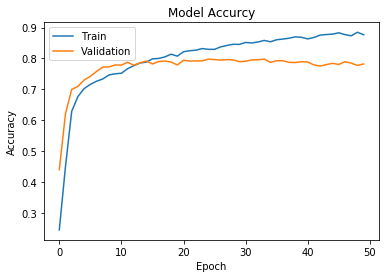

In [177]:
plt.plot(hist.history['acc'])
plt.plot(hist.history['val_acc'])
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.title('Model Accurcy')
plt.legend(['Train', 'Validation'])

Model seems to have high variance as train data accuracy deviates from test case. Cross validation may help to improve variance without significantly changing the architecture of the model

In [178]:
DNN.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_22 (Dense)             (None, 512)               32256     
_________________________________________________________________
dropout_10 (Dropout)         (None, 512)               0         
_________________________________________________________________
activation_22 (Activation)   (None, 512)               0         
_________________________________________________________________
dense_23 (Dense)             (None, 256)               131328    
_________________________________________________________________
batch_normalization_10 (Batc (None, 256)               1024      
_________________________________________________________________
activation_23 (Activation)   (None, 256)               0         
_________________________________________________________________
dense_24 (Dense)             (None, 128)               32896     
__________

In [179]:
#reverse encode the y_train
check = ReverseEncode(y_train, y_train_deep)

In [180]:
#predict test case
predict = DNN.predict(X_test)

In [181]:
#transforming predict to original category
predict_str = readable_predict(predict, check)

In [182]:
print('Accuracy of Neural Network:', round(accuracy_score(y_test, predict_str), 3))

Accuracy of Neural Network: 0.771


The accuracy of the neural network aligns will within the range of the score achieved from val_acc

In [183]:
print(confusion_matrix(y_test, predict_str))

[[ 537    0   10  161   47]
 [   0    0    4    1    0]
 [   6    0  278   16   24]
 [ 102    0   17 1185   43]
 [ 104    0   17   73  106]]


In [184]:
print(classification_report(y_test, predict_str))

                 precision    recall  f1-score   support

Adoption/Foster       0.72      0.71      0.71       755
           Died       0.00      0.00      0.00         5
           Euth       0.85      0.86      0.86       324
            Rto       0.83      0.88      0.85      1347
       Transfer       0.48      0.35      0.41       300

       accuracy                           0.77      2731
      macro avg       0.58      0.56      0.57      2731
   weighted avg       0.76      0.77      0.76      2731



C:\Users\sadmin\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Deep learning acheived the highest accuracy at 77.1% compared to validation test of 78%. It also have the highest adoption precision at 0.72. Logistics regression have the highest euthanization precision at 0.86 and naive bayes achived the highest euthanization recall at 0.88.

<a id='Remarks'></a>

## 3f. Remarks on Learning Model
Even though for most models, the accuracy is subpar, the models do provide some value. The purpose of this project was to idenfify dogs at risk for euthanization and transfer them to locations with better outcome. The first part could be achieve with high euthanization precision and recall for some location. For example Sonoma, the euthanization precision and recall could be achieve close to 90% with two separate models providing great confidence of which dogs are at risk. However this is not to say we are happy with the models. Adoption rate is a area that needs more work since no models were able to achieve a preciion score of 80%. This is essential to determining the location to send at risk dogs. Also, RTO and Transfer dogs are creating a real problem for predicting adoption and euthanization. According to the confusion matrixes generated in the models, most mistakes made from adoption and euthanization predicted as RTO and Transfer or RTO and transfer predicted as euthanization and adoption. This is the largest area of potential improvement to rectify the model from error and significantly improve the model.

Also choosing the right model for the shelters depends on the economic and buisness model of the shelter. For shelters that want to be more humane towards dogs, they can run the model prioritizing euthanization precision to idenfity the predicted dogs at risk. While more economical shelter can use the model with highest recall to be absolutely confident the dog is at risk. Once identify the same features could be run against all locations with models to find the best adoption/foster precision for transfer. 

However, once the model is chosen, the confusion matrix should be inspected. In this project, one of the most surprising finding was having a 1.0 recall. However, when the confusion matrix was inspected, only one euthanization was predicted for euthanization and was a true positive. Therefore, the recall, although 1.0, is extremely bias and the model shouldn’t be used for predicting euthanization.

<a id='Future'></a>

## 4. Future Work
Improve the featuring engineering of Age, Breed and Color <br>

Study the effects of features on RTO and Transfer<br>

Study the interdependencies of RTO, Transfer, Adoption and Euthanization rates<br>

Simplify outcome types with only survived and alive to improve accuracy and better target for euthanized dogs.<br>

Cross validate with other hyperparameters to improve accuracy<br>

Weight average all the models to create an ensemble model<br>

Engineer model to improve accuracy of euthanization rate and adoption rate<br>

Use transfer learning <br>